# Projekt 2 - final

# Analiza zbioru danych <u>Online Shoppers Purchasing Intention</u>
# Karol Degórski, Piotr Marciniak i Paweł Niewiadowski

## Import potrzebnych pakietów

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import seaborn as sns

## Wczytanie danych dotyczących zakupów online

In [2]:
online_shoppers_df = pd.read_csv('online_shoppers_intention.csv')
online_shoppers_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

## Załadowanie potrzebnego preprocessingu

Korzystając z wiedzy wyniesionej po drugim kamieniu milowym doszliśmy do wniosku, że nie opłacało się, kodować miesięcy one-hot encoderem, lepsze wyniki osiągneliśmy używając ordinal encodera. Dlatego w tym checkpoincie pominiemy sprawdzenie one-hot encodera.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder


log_features = ['ProductRelated', 'ProductRelated_Duration', 'Administrative']

ord_features = ['Month']

months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

ohe_features = ['VisitorType', 'OperatingSystems', 'Browser', 'Region'] 

# Ordinal encoding dla danych zlogarytmowanych
log_encoder = ColumnTransformer(
    [
        ('ord', OrdinalEncoder([months]), ord_features),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features),
        ('log', FunctionTransformer(np.log1p, np.expm1), log_features)
    ],
    remainder = 'passthrough'
)

# Ordinal encoding dla danych nie zlogarytmowanych
encoder = ColumnTransformer(
    [
        ('ord', OrdinalEncoder([months]), ord_features),
        ('ohe', OneHotEncoder(drop='if_binary'), ohe_features)
    ],
    remainder = 'passthrough'
)

Przygotowanie **pipeline'ów**.

In [4]:
log_stand = Pipeline([
    ("log_encoded", log_encoder),
    ("stand", StandardScaler())
])

norm_stand = Pipeline([
    ("norm_encoded", encoder),
    ("stand", StandardScaler())
])

### Usunięcie outlierów

In [5]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0).fit_predict(log_stand.fit_transform(online_shoppers_df))
clf = (clf + 1) / 2
log_stand_df = online_shoppers_df[clf.astype(bool)]
log_stand_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
5                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
5                         0.0              19               154.216667   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
5         0.015789   0.024561    0.000000         0.0   Feb                 2   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
5            2       1            3  Returning_Visitor    False    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[11732 rows x 18 columns]

In [6]:
clf = IsolationForest(random_state=0).fit_predict(norm_stand.fit_transform(online_shoppers_df))
clf = (clf + 1) / 2
norm_stand_df = online_shoppers_df[clf.astype(bool)]
norm_stand_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
5                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
5                         0.0              19               154.216667   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
5         0.015789   0.024561    0.000000         0.0   Feb                 2   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
5            2       1            3  Returning_Visitor    False    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[11843 rows x 18 columns]

Dzięki Isolation Forest nie bierzemy pod uwagę obserwacji uznanych za outliery. Zmniejszyło to nasze zbiory w zależności od kodowania o odpowienio 598 obserwacji (kodowanie logarytmiczne) i 487 obserwacji (kodowanie normalne). 

### Skorzystanie z pipelinów

In [7]:
log_stand_conv = log_stand.fit_transform(log_stand_df)
norm_stand_conv = norm_stand.fit_transform(norm_stand_df)

## Modelowanie

### Ciekawe wykresy z poprzedniego milestone'a
W tym punkcie chcielibyśmy zwrócić uwagę na ciekawe modele z poprzedniego checkpoint'a. Zależy nam na zwizualizowaniu ich przy użyciu wykresów 3D. Ustawienia, co do modeli przyjeliśmy na podstawie metryk obliczonych w tamtym checkpoincie, czyli metryki Calinskiego-Harabasza, Silhouette'a, Daviesa-Bouldina.

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

log_stand_tsne = TSNE().fit_transform(log_stand_conv)
norm_stand_tsne = TSNE().fit_transform(norm_stand_conv)

pca_log = PCA(n_components=3)
log_stand_pca = pca_log.fit_transform(log_stand_conv)

pca_norm = PCA(n_components=3)
norm_stand_pca = pca_norm.fit_transform(norm_stand_conv)

chose_set = {"log": (log_stand_conv, log_stand_pca, log_stand_tsne),
            "norm": (norm_stand_conv, norm_stand_pca, norm_stand_tsne)}

def review_model(model, which_set):
    normal_set, pca_set, tsne_set = chose_set.get(which_set)
    y = model.fit_predict(normal_set)
    show_groups_counts(y)
    plot3D(pca_set, y)
    draw_tsne(tsne_set, y)
    show_metrics_scores(normal_set, y)
    
def show_groups_counts(colors):
    unique, counts = np.unique(colors, return_counts=True)
    print("Group - Count")
    for k in range(len(unique)):
        print(f"{unique[k]} - {counts[k]}")
    
def plot3D(pca_set, colors):
    plt.figure(figsize=(12, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(pca_set[:, 0], pca_set[:, 1], pca_set[:, 2],
                c=colors, cmap='tab20')
    plt.show()

def show_metrics_scores(X, y):
    print(f"Metryka Silhouette'a: {silhouette_score(X, y)}")
    print(f"Metryka Calinskiego-Harabasza: {calinski_harabasz_score(X, y)}")
    print(f"Metryka Daviesa-Bouldina: {davies_bouldin_score(X, y)}")

def draw_tsne(X, y):
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y,
               cmap='tab20')
    plt.show()
    
print(f"Procent wyjaśnionej wariancji przy logarytmicznym kodowaniu: {sum(pca_log.explained_variance_ratio_)*100}%")
print(f"Procent wyjaśnionej wariancji przy normalnym kodowaniu: {sum(pca_norm.explained_variance_ratio_)*100}%")

Procent wyjaśnionej wariancji przy logarytmicznym kodowaniu: 19.215887780446515%
Procent wyjaśnionej wariancji przy normalnym kodowaniu: 18.317494608254403%


Powyżej mamy opisane, ile procent wariancji zostało wyjaśnione w zależności od kodowania.

In [9]:
def draw_distributions(X, y):
    df = X.copy()
    df["Weekend"] = df["Weekend"].astype(int)
    df["Revenue"] = df["Revenue"].astype(int)
    for column in df:
        print(column)
        df[column].hist(by=y,figsize=(25, 10), bins=20)
        plt.show()

In [10]:
def plot_scores(estimator, X, max_clusters=20):
    
    cluster_num_seq = range(2, max_clusters+1)
    
    scores = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
    
    scores_values = count_clustering_scores(X, cluster_num_seq, estimator, scores)
    
    plt.plot(cluster_num_seq, scores_values[silhouette_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki silhouette')
    plt.title('Wartość miary silhouette')
    plt.show()
        
    plt.plot(cluster_num_seq, scores_values[calinski_harabasz_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Calinski-Harabasz')
    plt.title('Wartość miary Calinski-Harabasz')
    plt.show()
    
    plt.plot(cluster_num_seq, scores_values[davies_bouldin_score], 'bx-')
    plt.xlabel('Liczba klastrów')
    plt.ylabel('Miara metryki Davies-Bouldin')
    plt.title('Wartość miary Davies-Bouldin')
    plt.show()
    
def count_clustering_scores(X, cluster_num, model, scores_fun_list):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = {}    
    for x in scores_fun_list:
        scores[x] = []
        
    for k in cluster_num_iter:
        if type(model).__name__[-15:] == 'GaussianMixture':
            model.set_params(n_components=k)
        else:
            model.set_params(n_clusters=k)
      
        labels = model.fit_predict(X)
        for a in scores_fun_list:
            temp = scores[a]
            temp.append(a(X, labels))
            scores[a] = temp
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

#### KMeans
##### Próba z kodowaniem logarytmicznym

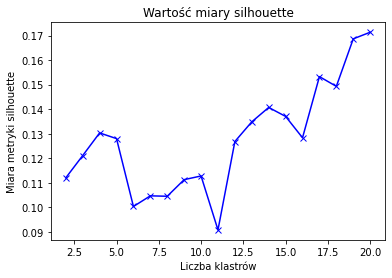

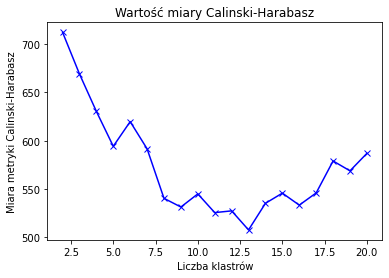

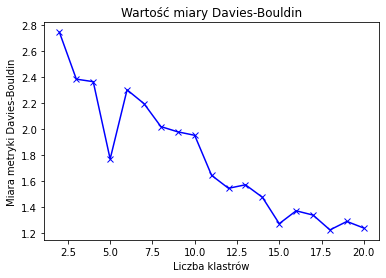

In [11]:
from sklearn.cluster import KMeans
plot_scores(KMeans(random_state=0, n_init = 20), log_stand_conv)

Na podstawie tych metryk za interesującą liczbę klastrów uznaliśmy 4, 5, 18. Poniżej widzimy wizualizację działania tych klastrowań.

Group - Count
0 - 824
1 - 7524
2 - 1491
3 - 1893


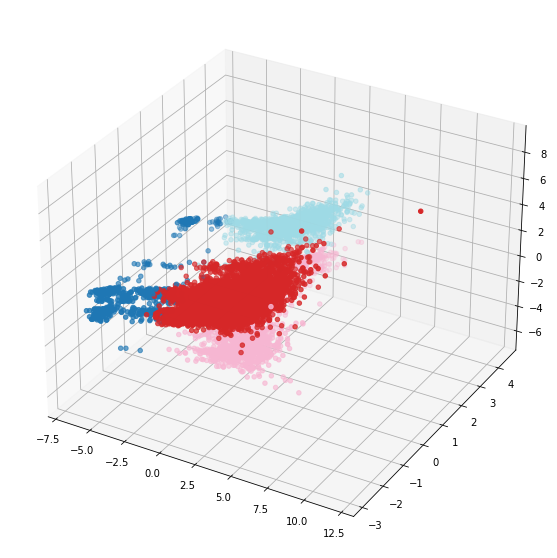

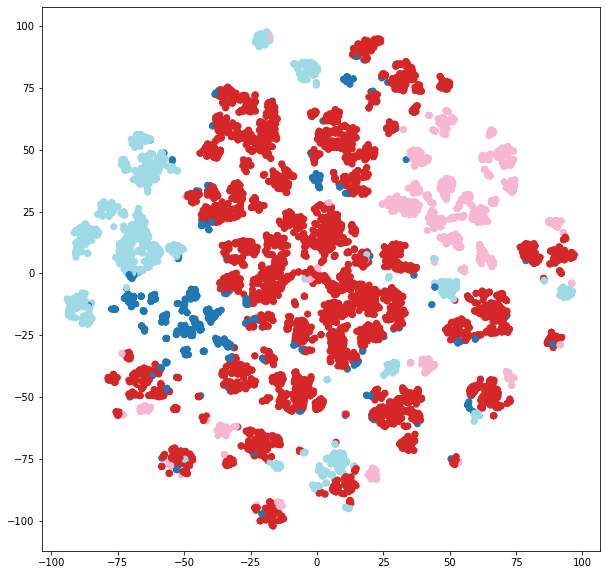

Metryka Silhouette'a: 0.13030181964230328
Metryka Calinskiego-Harabasza: 630.4476436562809
Metryka Daviesa-Bouldina: 2.363370523621071


In [12]:
review_model(KMeans(n_clusters=4, random_state=0, n_init = 20), "log")

Group - Count
0 - 818
1 - 404
2 - 8329
3 - 6
4 - 2175


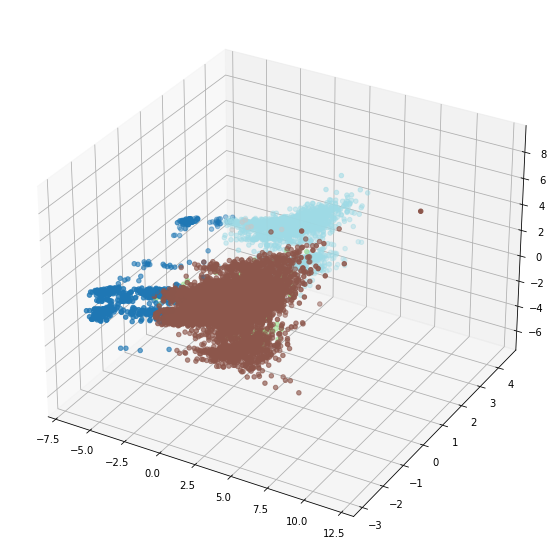

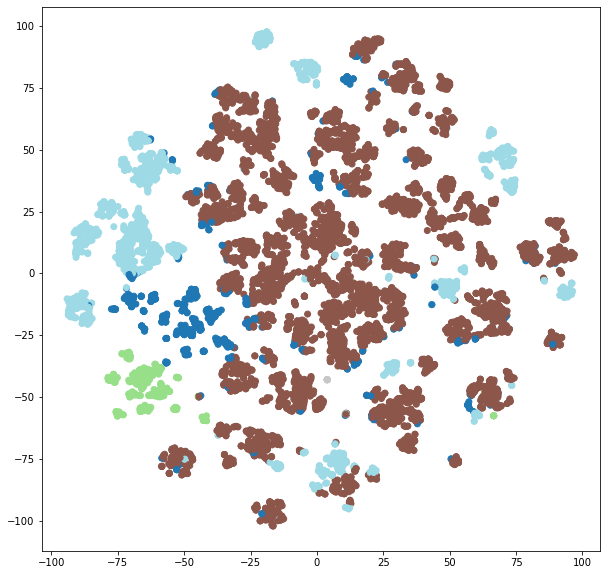

Metryka Silhouette'a: 0.1279813408184567
Metryka Calinskiego-Harabasza: 594.2523299317467
Metryka Daviesa-Bouldina: 1.7702422468964496


In [13]:
review_model(KMeans(n_clusters=5, random_state=0, n_init = 20), "log")

Group - Count
0 - 672
1 - 401
2 - 4020
3 - 606
4 - 1720
5 - 660
6 - 6
7 - 3
8 - 19
9 - 1872
10 - 1030
11 - 1
12 - 74
13 - 150
14 - 6
15 - 401
16 - 81
17 - 10


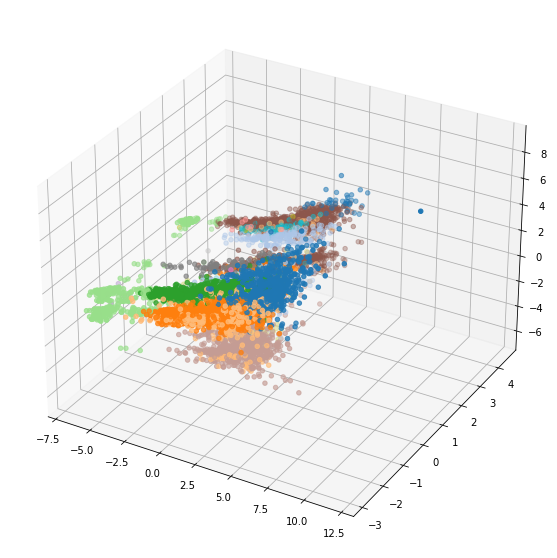

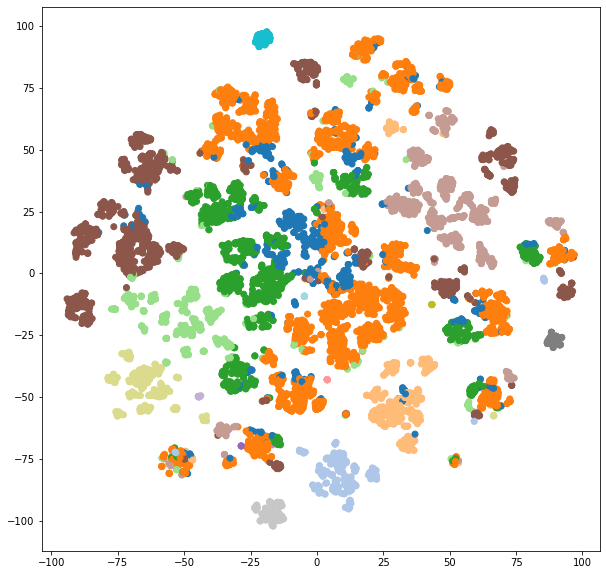

Metryka Silhouette'a: 0.14928535771355986
Metryka Calinskiego-Harabasza: 578.9951891952818
Metryka Daviesa-Bouldina: 1.226330756254855


In [14]:
review_model(KMeans(n_clusters=18, random_state=0, n_init = 20), "log")

Żaden z powyższych modeli nie osiągnął wg nas powalających wyników. Warto przyjrzeć KMeans dla 4 klastrów, ponieważ otrzymane wyniki wyglądają ciekawie. We wszystkich wykresach widzimy, że w *t-SNE* klastry rozkładaja się bardzo rozległe.
##### Próba z kodowaniem normalnym

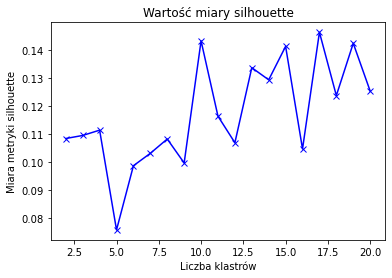

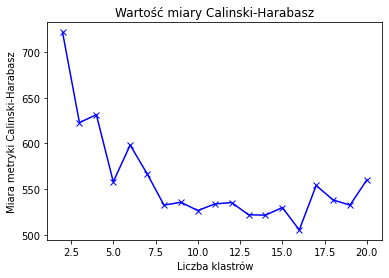

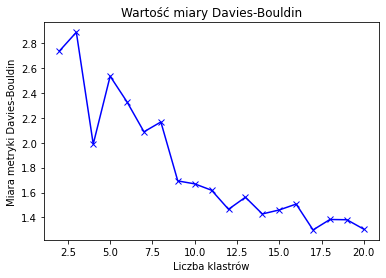

In [15]:
plot_scores(KMeans(random_state=0, n_init = 20), norm_stand_conv)

Sprawdźmy teraz działanie KMeans dla 4 i 10 klastrów.

Group - Count
0 - 1305
1 - 6
2 - 663
3 - 796
4 - 1915
5 - 5561
6 - 419
7 - 92
8 - 1080
9 - 6


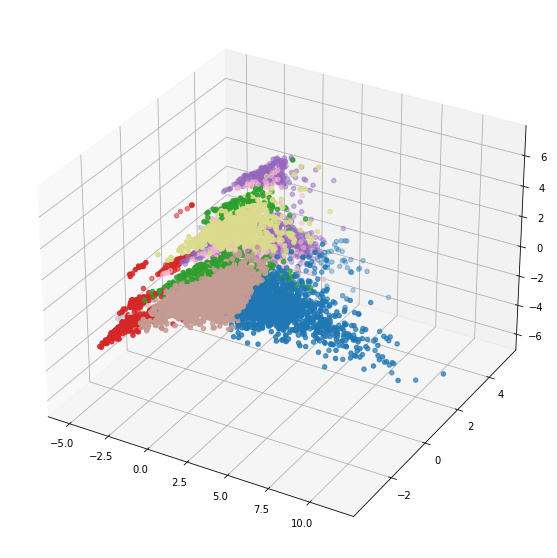

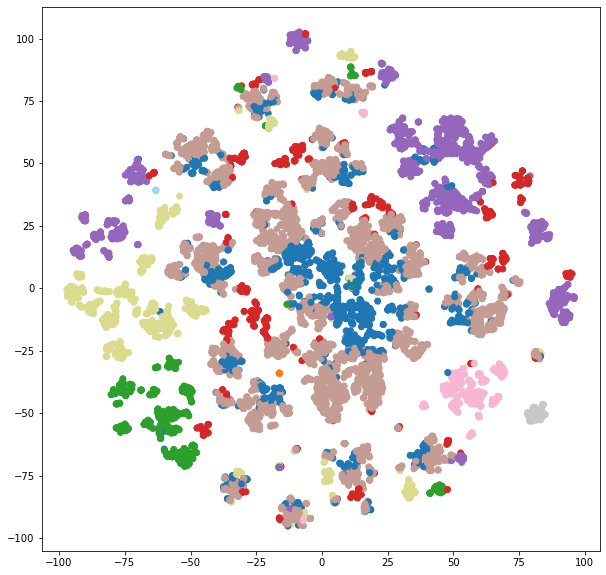

Metryka Silhouette'a: 0.14330750895341954
Metryka Calinskiego-Harabasza: 526.5377521062147
Metryka Daviesa-Bouldina: 1.669614769909964


In [16]:
review_model(KMeans(n_clusters=10, random_state=0, n_init = 20), "norm")

Group - Count
0 - 8200
1 - 2092
2 - 6
3 - 1545


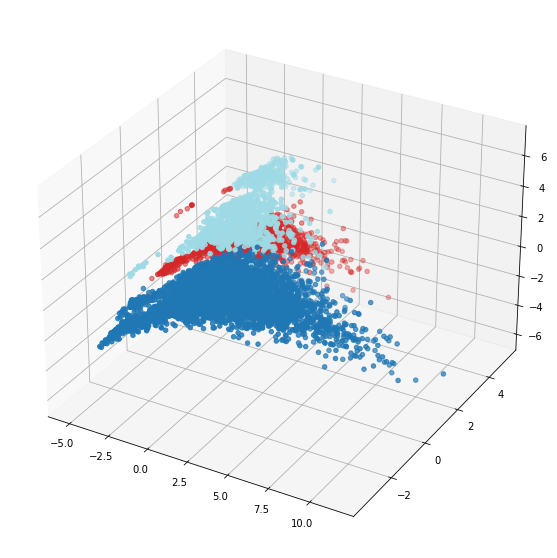

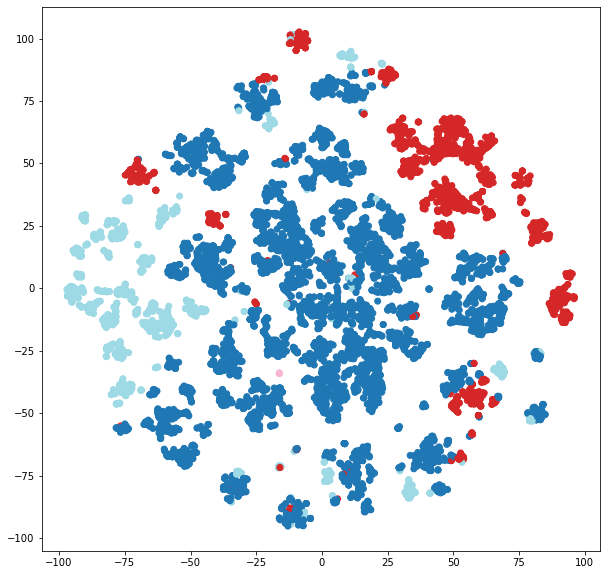

Metryka Silhouette'a: 0.11145412484869364
Metryka Calinskiego-Harabasza: 631.4927903592794
Metryka Daviesa-Bouldina: 1.9890011775838219


In [17]:
review_model(KMeans(n_clusters=4,random_state=0, n_init = 20), "norm")

Najlepiej naszym zdaniem z kmeans wykazało się klastrowanie z preprocessingiem logarytmowania, gdzie wskazaliśmy jako liczbę klastrów 4.

#### Agglomerative Clustering
Odrzuciliśmy metody z linkagem **complete**, **single**, **average**, gdyż zwracały dosyć podobne wyniki, które nas nie zadowalały.
##### Próba z kodowaniem logarytmicznym

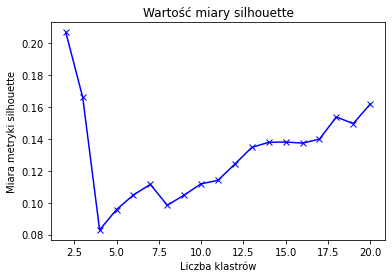

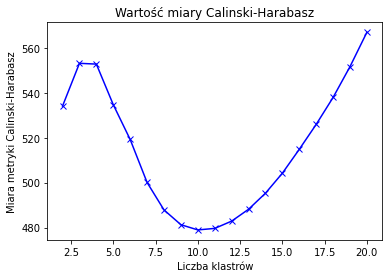

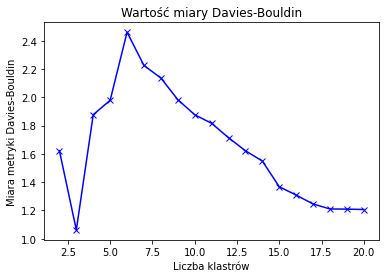

In [18]:
from sklearn.cluster import AgglomerativeClustering

plot_scores(AgglomerativeClustering(linkage='ward'), log_stand_conv)

Naszym zdaniem na podstawie metryk najbardziej obiecującą liczbą klastrów wydawało się 3 i 20.

Group - Count
0 - 11170
1 - 556
2 - 6


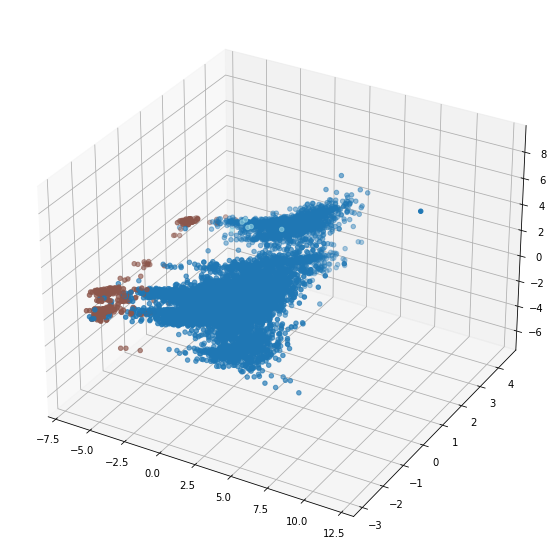

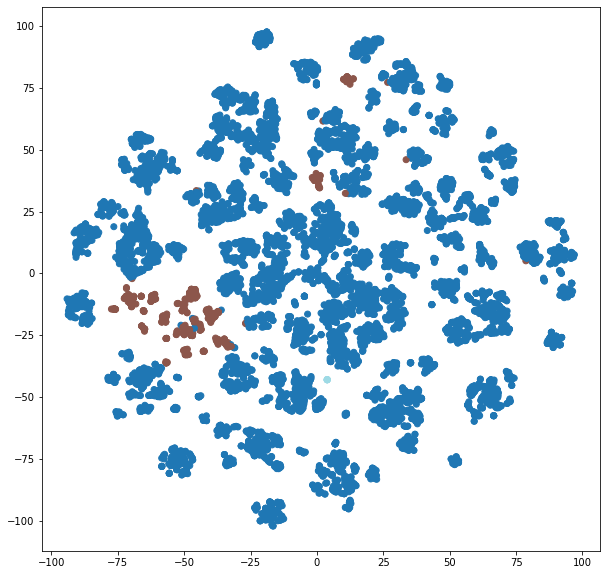

Metryka Silhouette'a: 0.16609468441880826
Metryka Calinskiego-Harabasza: 553.188567026298
Metryka Daviesa-Bouldina: 1.062223307035502


In [19]:
review_model(AgglomerativeClustering(linkage='ward', n_clusters=3), "log")

Group - Count
0 - 42
1 - 924
2 - 6291
3 - 1004
4 - 1317
5 - 166
6 - 74
7 - 556
8 - 391
9 - 270
10 - 19
11 - 6
12 - 149
13 - 10
14 - 1
15 - 6
16 - 44
17 - 3
18 - 378
19 - 81


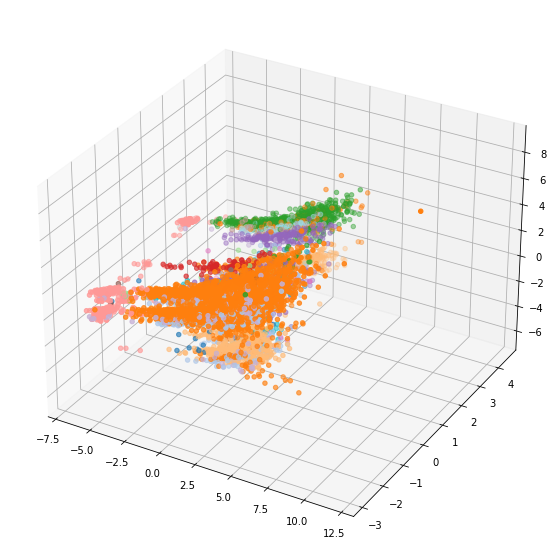

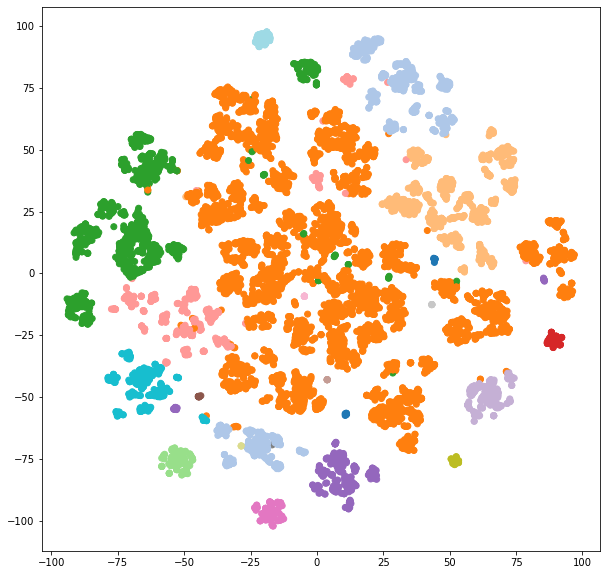

Metryka Silhouette'a: 0.1617763775168524
Metryka Calinskiego-Harabasza: 567.0386278084745
Metryka Daviesa-Bouldina: 1.206637817791843


In [20]:
review_model(AgglomerativeClustering(linkage='ward', n_clusters=20), "log")

##### Próba z kodowaniem normalnym

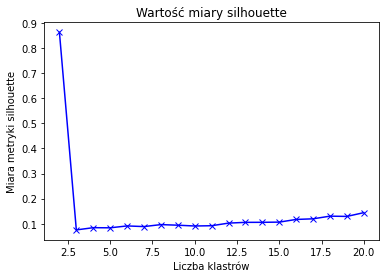

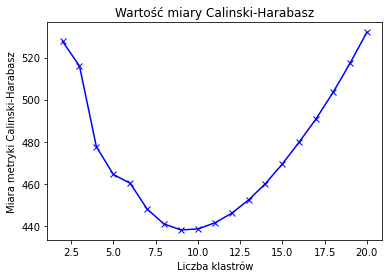

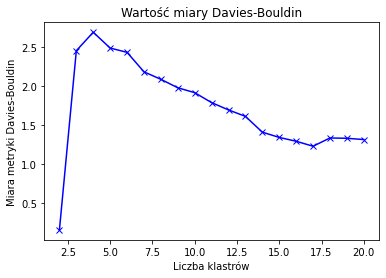

In [21]:
plot_scores(AgglomerativeClustering(linkage='ward'), norm_stand_conv)

Z kolei przy wynikach tych metryk najciekawszymi liczbami klastrów wydawała się 2 i 20.

Group - Count
0 - 11837
1 - 6


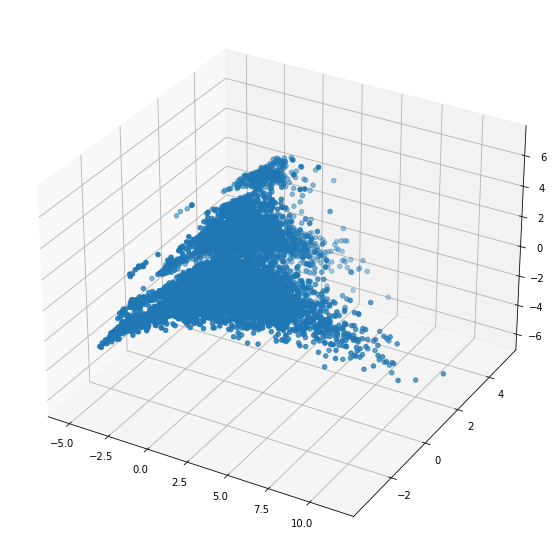

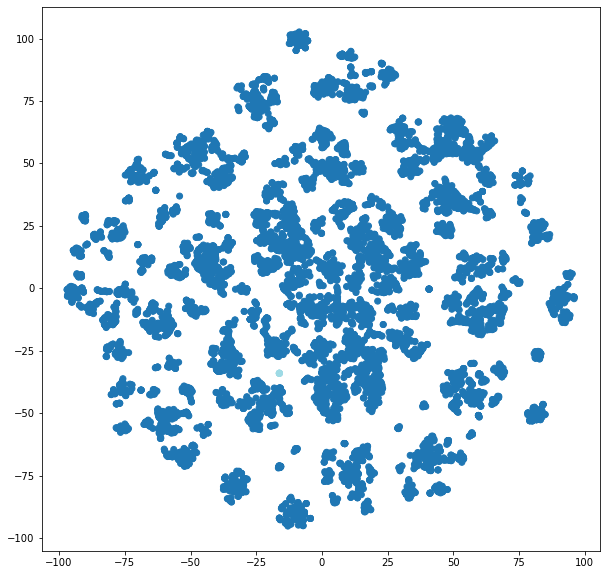

Metryka Silhouette'a: 0.8637339317063207
Metryka Calinskiego-Harabasza: 527.636496787596
Metryka Daviesa-Bouldina: 0.1571248134686266


In [22]:
review_model(AgglomerativeClustering(linkage='ward', n_clusters=2), "norm")

Group - Count
0 - 47
1 - 1006
2 - 19
3 - 5835
4 - 911
5 - 165
6 - 92
7 - 151
8 - 1401
9 - 622
10 - 622
11 - 3
12 - 10
13 - 1
14 - 6
15 - 6
16 - 46
17 - 99
18 - 402
19 - 399


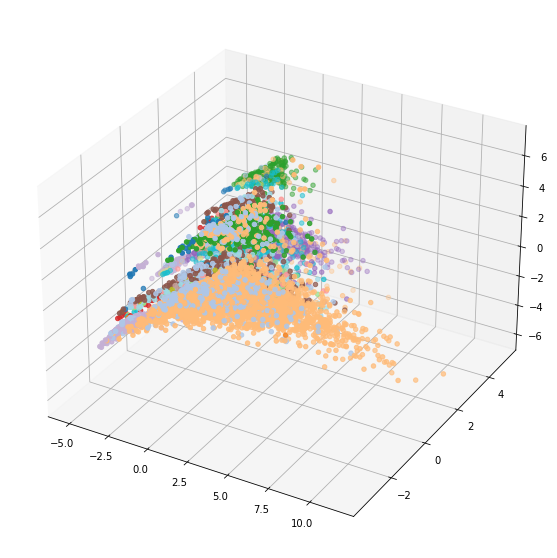

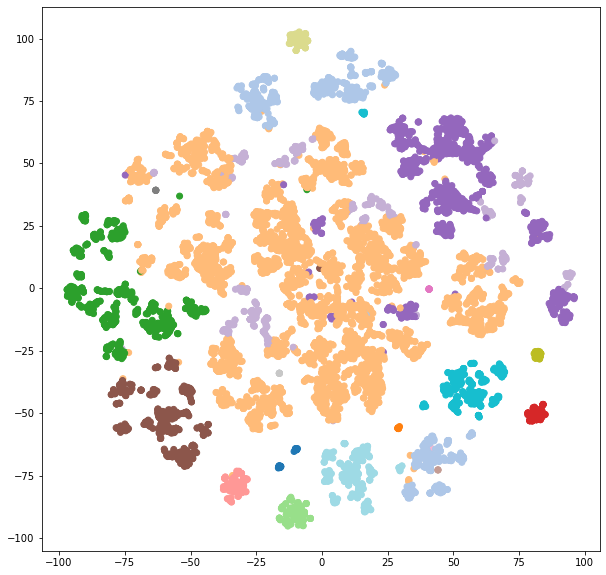

Metryka Silhouette'a: 0.14391449402656992
Metryka Calinskiego-Harabasza: 532.0004075650872
Metryka Daviesa-Bouldina: 1.31679978612636


In [23]:
review_model(AgglomerativeClustering(linkage='ward', n_clusters=20), "norm")

Jeśli chodzi o Aglomerartive Clustering, najlepszy naszym zdaniem wynik osiągneliśmy przy użyciu logarytmicznego preprocessingu dla 20 klastrów.

#### Affinity propagation
Ze względu na to, że zwracał bardzo dużą liczbę klastrów wydał nam sie mało praktyczny, zwracał de facto wiele małych grup.

### Nowe modele

Sprawdzimy teraz jak z naszym problemem radzą sobie modele DBSCAN, Gaussian i OPTICS

#### DBSCAN

##### Próba z kodowaniem logarytmicznym
Wiemy że nasze dane mają 47 wymiarów, zatem weźmiemy parametr minPts = 94

In [24]:
log_stand_conv.shape

(11732, 47)

In [25]:
norm_stand_conv.shape

(11843, 47)

In [26]:
from sklearn.neighbors import NearestNeighbors

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
def choose_eps_plot_DBSCAN(minPts, X):
    nbrs = NearestNeighbors(n_neighbors=minPts).fit(X)
    distances, indices = nbrs.kneighbors(X)
    distanceDec = sorted(distances[:,minPts-1], reverse=True)
    plt.figure(figsize=(9,6))

    plt.xlabel('Indeks punktu po sortowaniu')
    plt.ylabel(f'Dystans od {minPts} najbliższego sąsiada')
    plt.plot(list(range(1,X.shape[0]+1)), distanceDec)

    plt.xscale('log')
    plt.grid(axis='y')


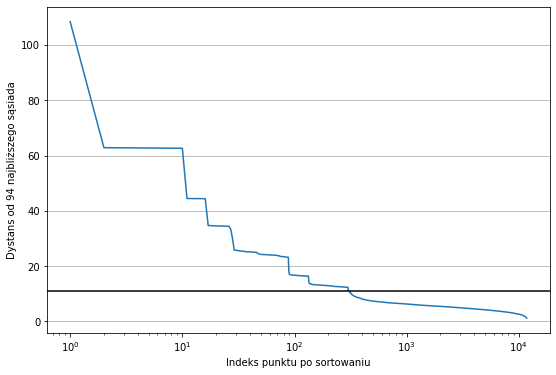

In [29]:
choose_eps_plot_DBSCAN(94, log_stand_conv)
plt.axhline(11, c='black')
plt.show()

Widzimy, że ostatni duży skok jest dla odległości 11, dlatego też taki weźmiemy epsilon do modelu.

Group - Count
-1 - 287
0 - 11445


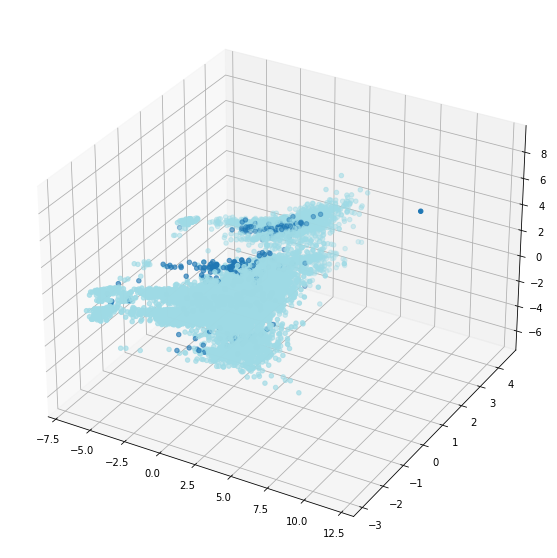

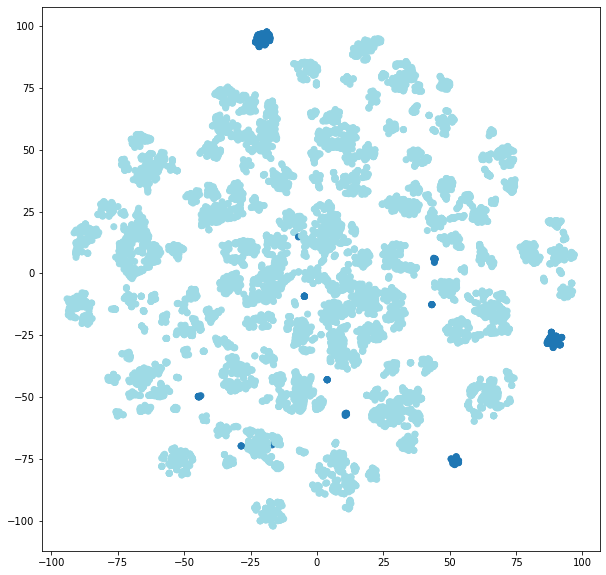

Metryka Silhouette'a: 0.5892249409842311
Metryka Calinskiego-Harabasza: 273.0602071401328
Metryka Daviesa-Bouldina: 3.581801515058602


In [30]:
review_model(DBSCAN(min_samples=94, eps=11), "log")

Stworzył się jeden klaster, zatem nie jest to pożyteczny model.

Zobaczmy jak wygląda predykcja dla eps = 8

Group - Count
-1 - 301
0 - 11118
1 - 164
2 - 149


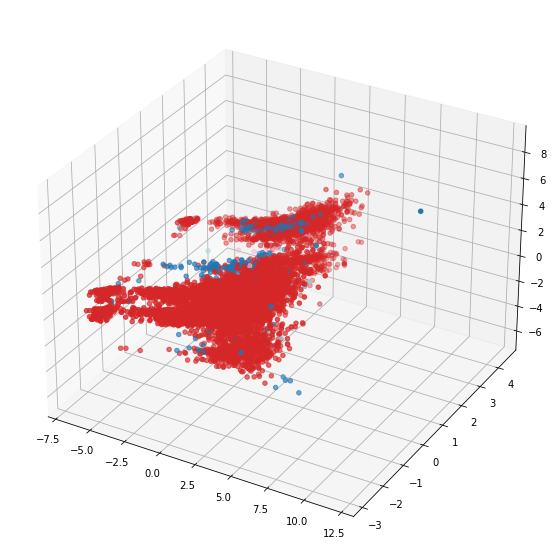

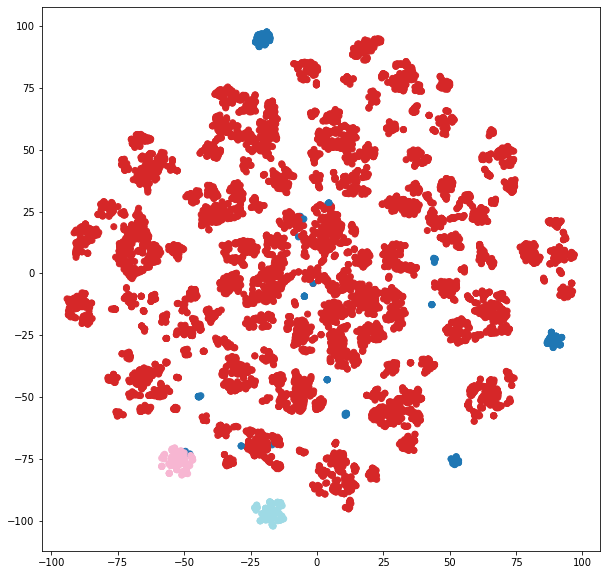

Metryka Silhouette'a: 0.29932772926631596
Metryka Calinskiego-Harabasza: 275.8021526521573
Metryka Daviesa-Bouldina: 2.9196112098026505


In [31]:
review_model(DBSCAN(min_samples=94, eps=8), "log")

##### Próba z kodowaniem normalnym
Sprawdźmy dla drugiej transformacji danych:

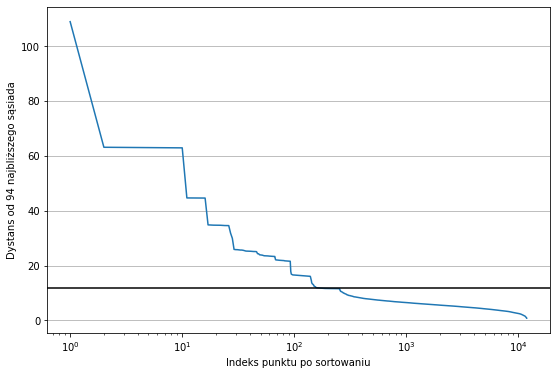

In [32]:
choose_eps_plot_DBSCAN(94, norm_stand_conv)
plt.axhline(12, c='black')
plt.show()

Widzimy, że wykres wygląda podobnie do poprzedniego. Najlepszym epsilonem wydaje się nam, że jest 12.

Group - Count
-1 - 138
0 - 11705


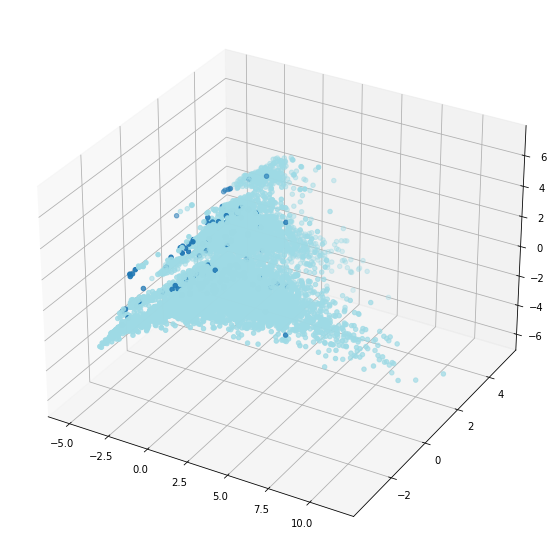

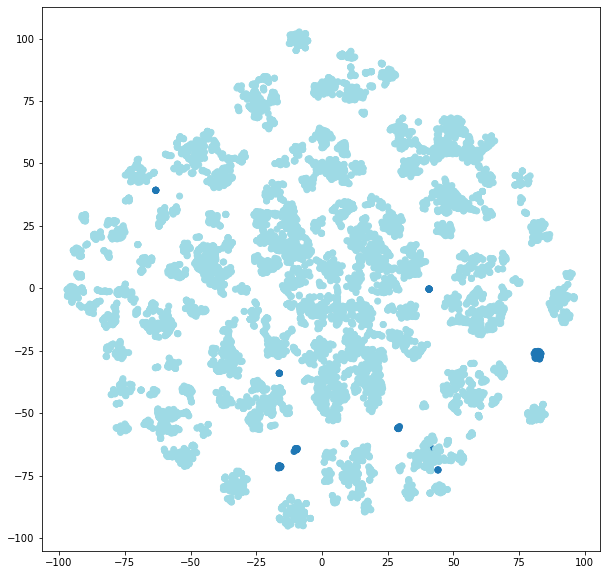

Metryka Silhouette'a: 0.6858496753109399
Metryka Calinskiego-Harabasza: 276.1077710447917
Metryka Daviesa-Bouldina: 3.1267359277366116


In [33]:
review_model(DBSCAN(min_samples=94, eps=12), "norm")

Sprawdźmy jeszcze dla eps = 8

Group - Count
-1 - 251
0 - 11180
1 - 162
2 - 151
3 - 99


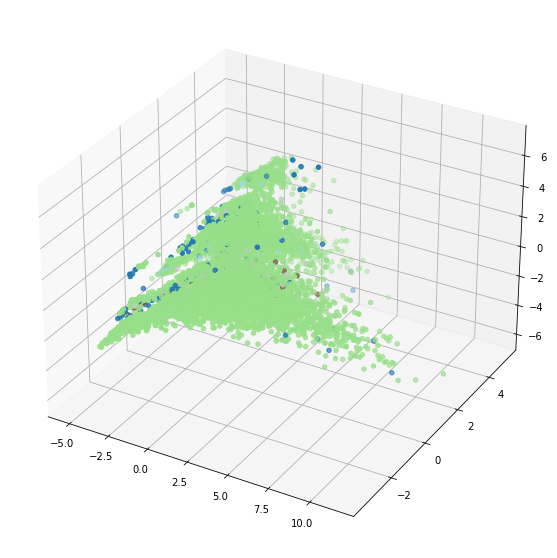

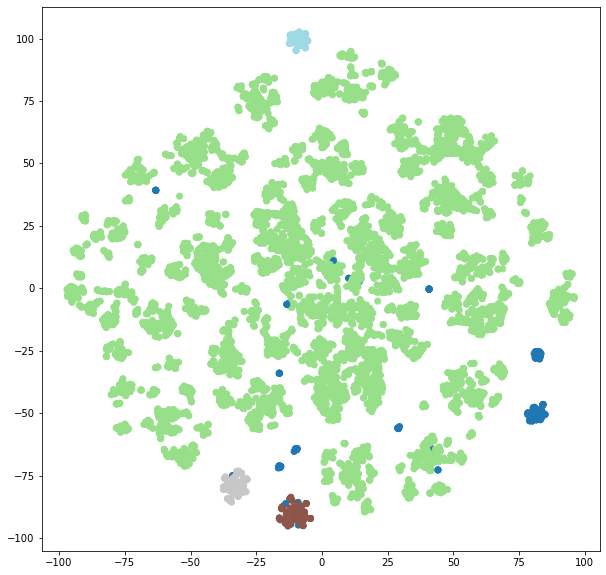

Metryka Silhouette'a: 0.30453490963902596
Metryka Calinskiego-Harabasza: 284.9557782267598
Metryka Daviesa-Bouldina: 2.6217638205087526


In [34]:
review_model(DBSCAN(min_samples=94, eps=8), "norm")

Roziązanie dla eps = 12 znalazło nam więcej outlierów i kalstrów. Ogólnie patrząc też na wartości metryk wydaje się lepsze

Zatem przetestujmy jeszcze eps = 8

#### Gaussian
##### Próba z kodowaniem logarytmicznym

In [35]:
from sklearn.mixture import GaussianMixture

Musimy wybrać jeszcze optymalną wartość n_components. Użyjemy do tego funkcji plot_scores z drugiego kamienia milowego.

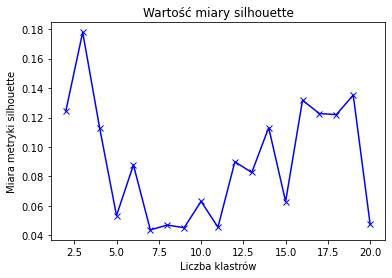

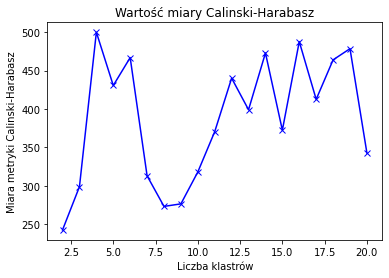

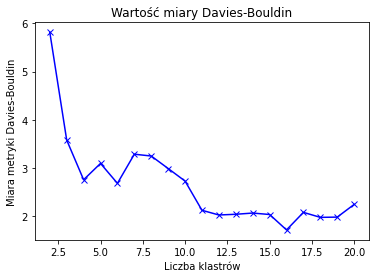

In [36]:
plot_scores(GaussianMixture(covariance_type='full'), log_stand_conv)

Trudno jest jednoznacznie wybrać liczbę komponentów patrząc po tych metrykach. Być może 20 jest wartością optymalną.

Group - Count
0 - 267
1 - 341
2 - 490
3 - 45
4 - 6
5 - 711
6 - 636
7 - 356
8 - 21
9 - 149
10 - 21
11 - 727
12 - 416
13 - 4621
14 - 6
15 - 717
16 - 1
17 - 10
18 - 1551
19 - 640


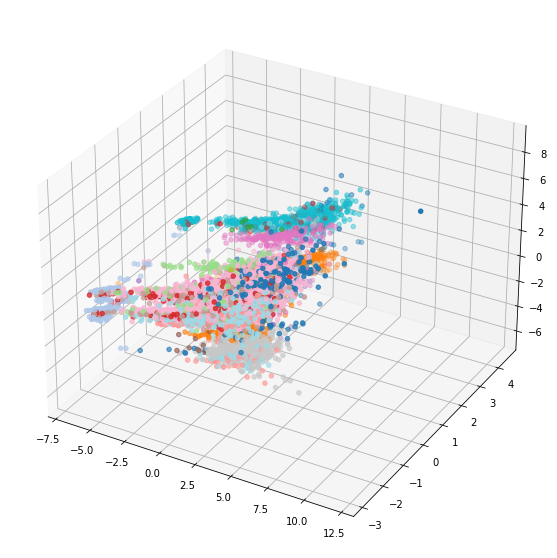

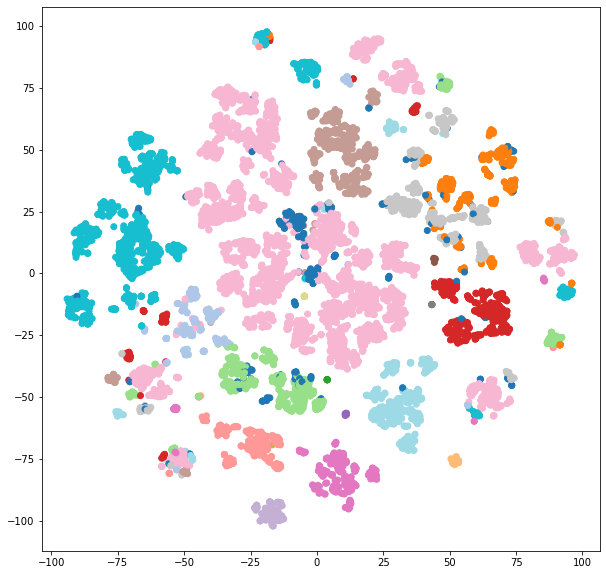

Metryka Silhouette'a: 0.1437045491280914
Metryka Calinskiego-Harabasza: 467.98376523076723
Metryka Daviesa-Bouldina: 1.524761035655583


In [37]:
review_model(GaussianMixture(n_components=20, covariance_type='full'), "log")

Wykres *t-SNE* swoimi kolorami bardziej przypomina dzieło impresjonizmu niż klastrowania.
##### Próba z kodowaniem normalnym

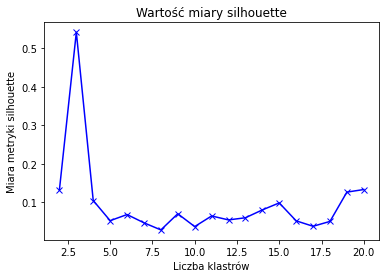

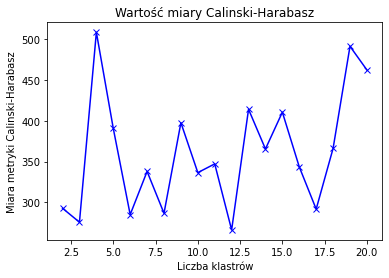

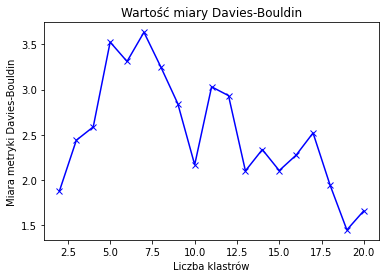

In [38]:
plot_scores(GaussianMixture(covariance_type='full'), norm_stand_conv)

Zauważmy, że dla tego kodowania dobrze jest wybrać 4 komponenty.

Group - Count
0 - 2377
1 - 9027
2 - 429
3 - 10


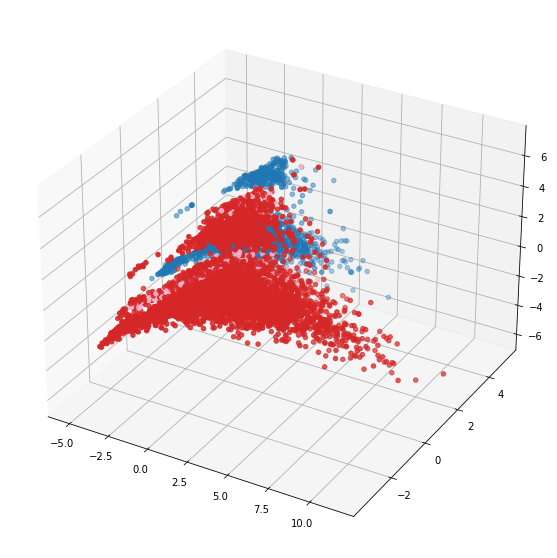

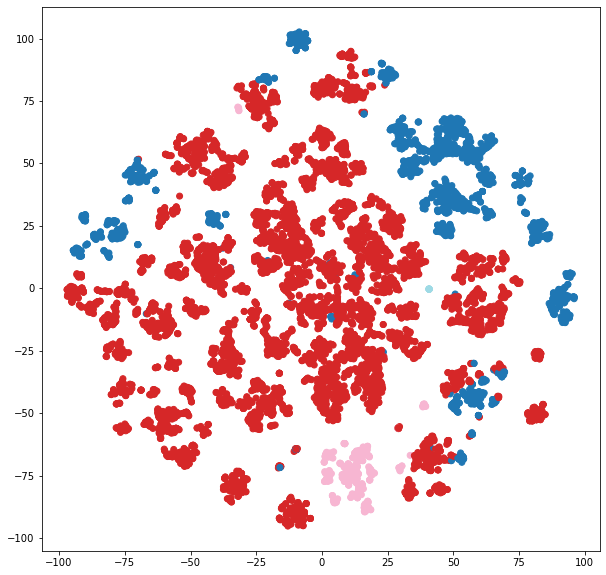

Metryka Silhouette'a: 0.11746598194203553
Metryka Calinskiego-Harabasza: 453.5966013719195
Metryka Daviesa-Bouldina: 1.8625657598782512


In [39]:
review_model(GaussianMixture(n_components=4, covariance_type='full'), "norm")

Znalezione optymalne liczby klastrów dla obydwu sposobów transformacji danych są różne, jednak mimo że na wykresach możemy zobaczyć, że jakiś sens mają, to metoda Gaussian nie wydaje się być optymalną dla naszego problemu.

#### OPTICS

##### Próba z kodowaniem logarytmicznym

Group - Count
-1 - 11419
0 - 165
1 - 148


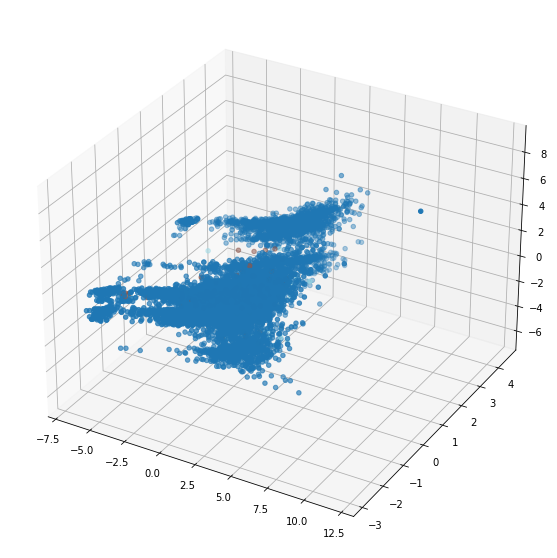

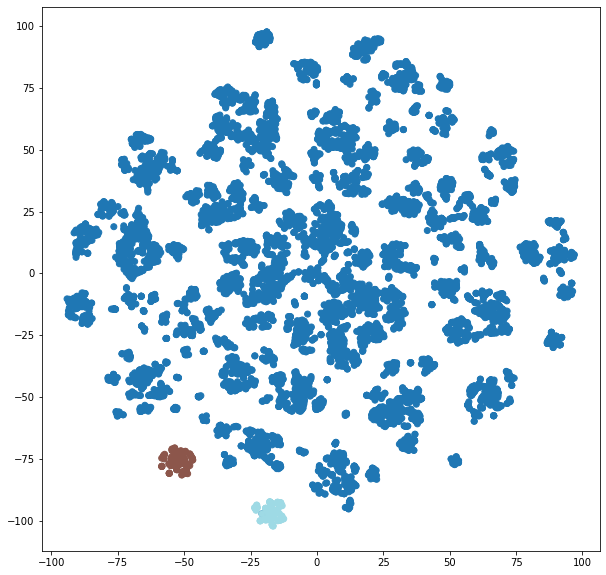

Metryka Silhouette'a: 0.2819128973092431
Metryka Calinskiego-Harabasza: 271.44155019504166
Metryka Daviesa-Bouldina: 1.182212422172575


In [40]:
from sklearn.cluster import OPTICS
review_model(OPTICS(min_samples=94), "log")

##### Próba z kodowaniem normalnym

Group - Count
-1 - 11431
0 - 162
1 - 151
2 - 99


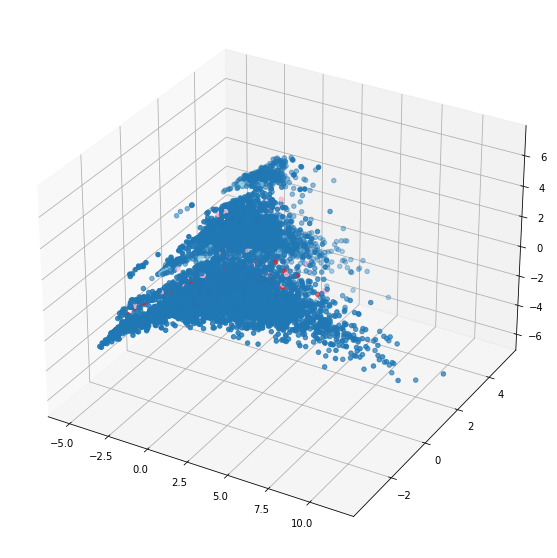

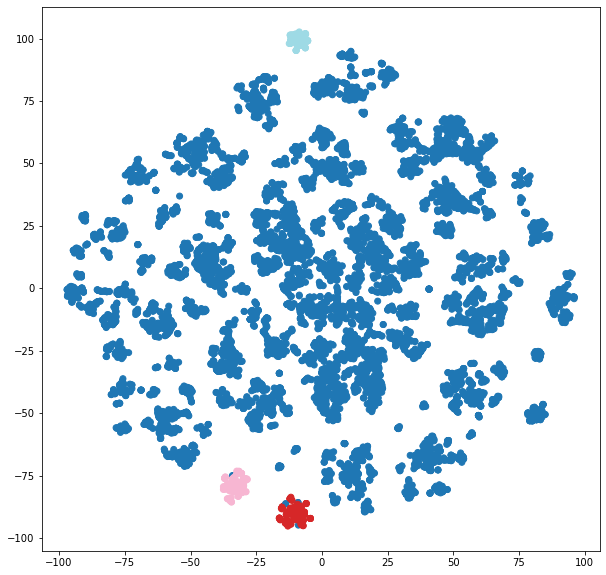

Metryka Silhouette'a: 0.2869169111220393
Metryka Calinskiego-Harabasza: 282.4246505810382
Metryka Daviesa-Bouldina: 1.0897975749310775


In [41]:
review_model(OPTICS(min_samples=94), "norm")

Metoda OPTICS zwróciła wyniki podobne do DBSCANa, które nie wydają się nam za bardzo przydatne ze względu na powstanie jednego dużego klastra i kilku znacznie mniejszych.

## Podsumowanie
Naszą subiektywną opinią najlepszy wynik osiągnęła metoda K-Means dla 4 klastrów. Wynika to głównie z tego, że osiąga ona najlepszy wynik w metryce Caliniśkiego-Harabasza.

In [42]:
summary = pd.DataFrame.from_records([[0.13030181964230328, 630.4476436562809, 2.363370523621071],
                                     [0.14391449402656992, 532.0004075650872, 1.31679978612636], 
                                     [0.29932772926631596, 275.8021526521573, 2.9196112098026505], 
                                     [0.12869817514759102, 495.2831688648315, 1.6402070661980523], 
                                     [0.2819128973092431, 271.44155019504166, 1.182212422172575]], 
                       columns =['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'],
                       index = ['K-Means', 'Agglomerative ward', 'DBSCAN', 'Gaussian', 'Optics'])
summary

Silhouette  Calinski-Harabasz  Davies-Bouldin
K-Means               0.130302         630.447644        2.363371
Agglomerative ward    0.143914         532.000408        1.316800
DBSCAN                0.299328         275.802153        2.919611
Gaussian              0.128698         495.283169        1.640207
Optics                0.281913         271.441550        1.182212

Group - Count
0 - 824
1 - 7524
2 - 1491
3 - 1893


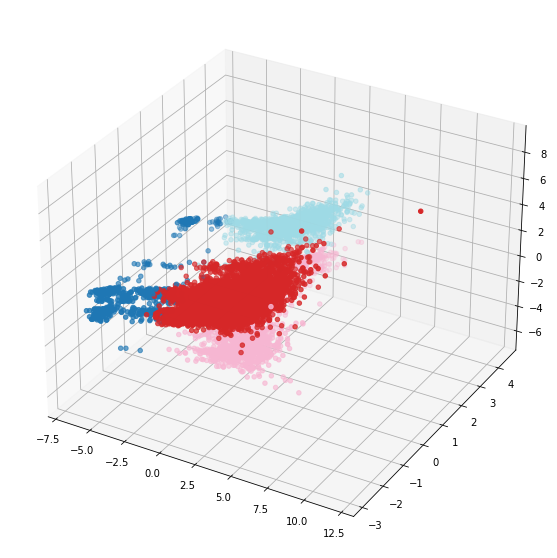

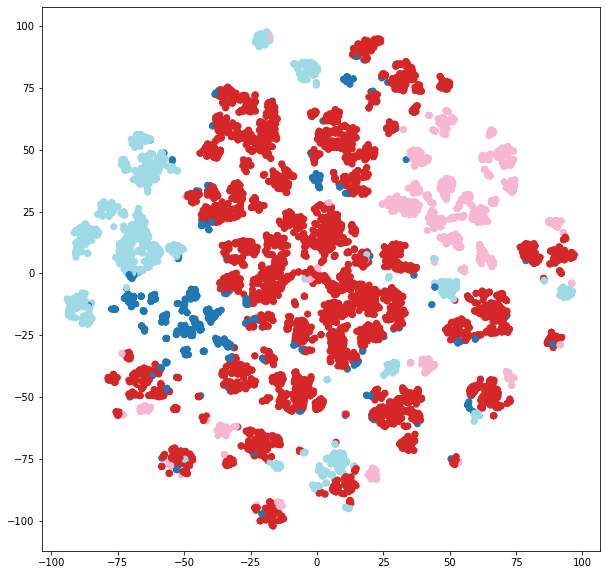

Metryka Silhouette'a: 0.13030181964230328
Metryka Calinskiego-Harabasza: 630.4476436562809
Metryka Daviesa-Bouldina: 2.363370523621071


In [43]:
review_model(KMeans(n_clusters=4, random_state=0, n_init=20), "log")

In [44]:
from sklearn.cluster import KMeans
online_shoppers_df["Cluster"] = -1
online_shoppers_df.loc[log_stand_df.index.to_list(), ["Cluster"]] = KMeans(n_clusters=4, random_state=0, n_init=20).fit_predict(log_stand_conv)
online_shoppers_df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  \
0            1       1            1  Returning_Visitor    False    False   
1            2       1            2  Returning_Visitor    False    False   
2            1       9            3  Returning_Visitor    False    False   
3            2       2            4  Returning_Visitor    False    False   
4            3       1            4  Returning_Visitor     True    False   
...        ...     ...          ...                ...      ...      ...   
12325        6       1            1  Returning_Visitor     True    False   
12326        2       1            8  Returning_Visitor     True    False   
12327        2       1           13  Returning_Visitor     True    False   
12328        2       3           11  Returning_Visitor    False    False   
12329        2       1            2        New_Visitor     True    False   

       Cluster  
0            0  
1            1  
2           -1  
3            0  
4            1  
...        ...  
12325        1  
12326        1  
12327        1  
12328        1  
12329        2  

[12330 rows x 19 columns]

Spójrzmy, na to jak wyglądają członkowie należący do naszych klastrów.
#### Jak wyglądają dane klastry

Administrative


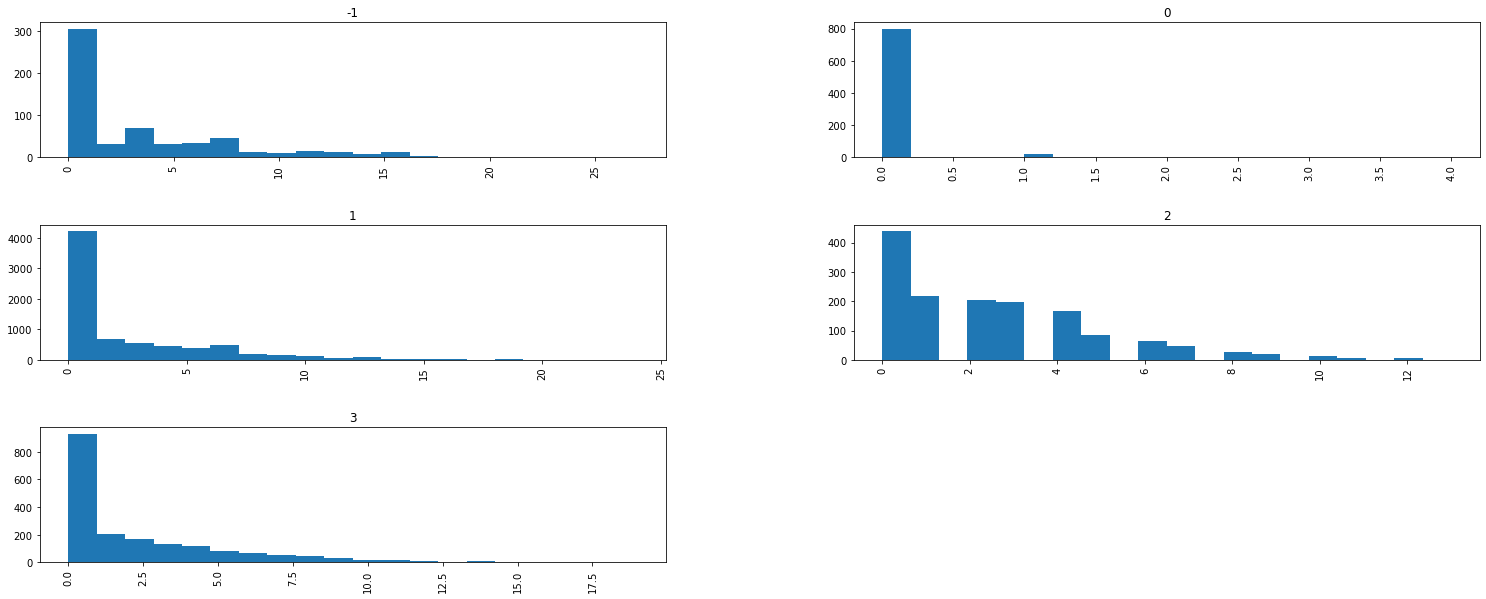

Administrative_Duration


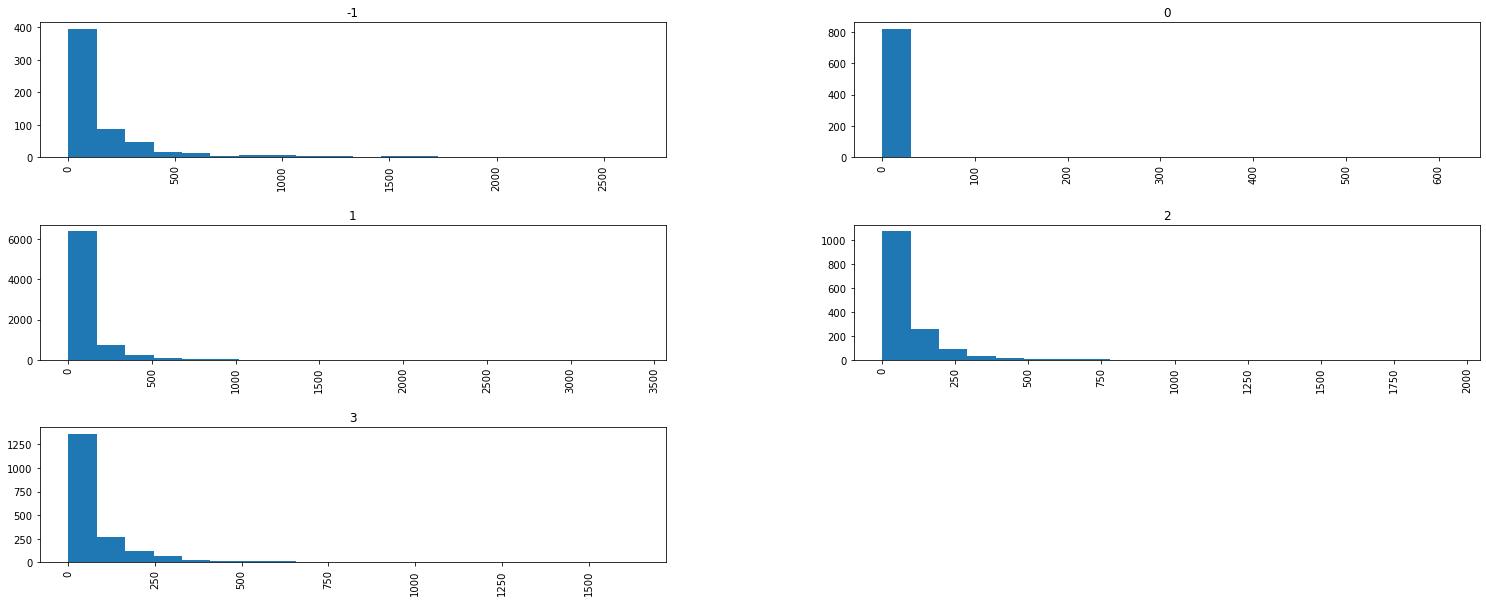

Informational


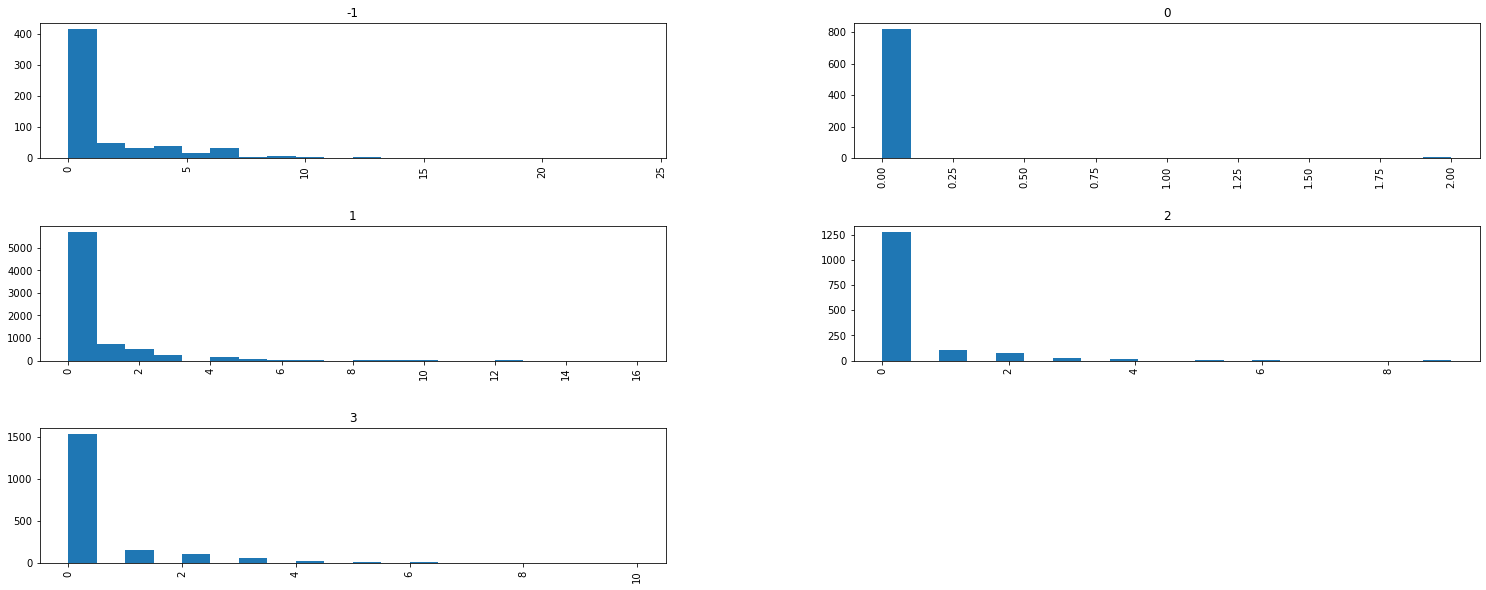

Informational_Duration


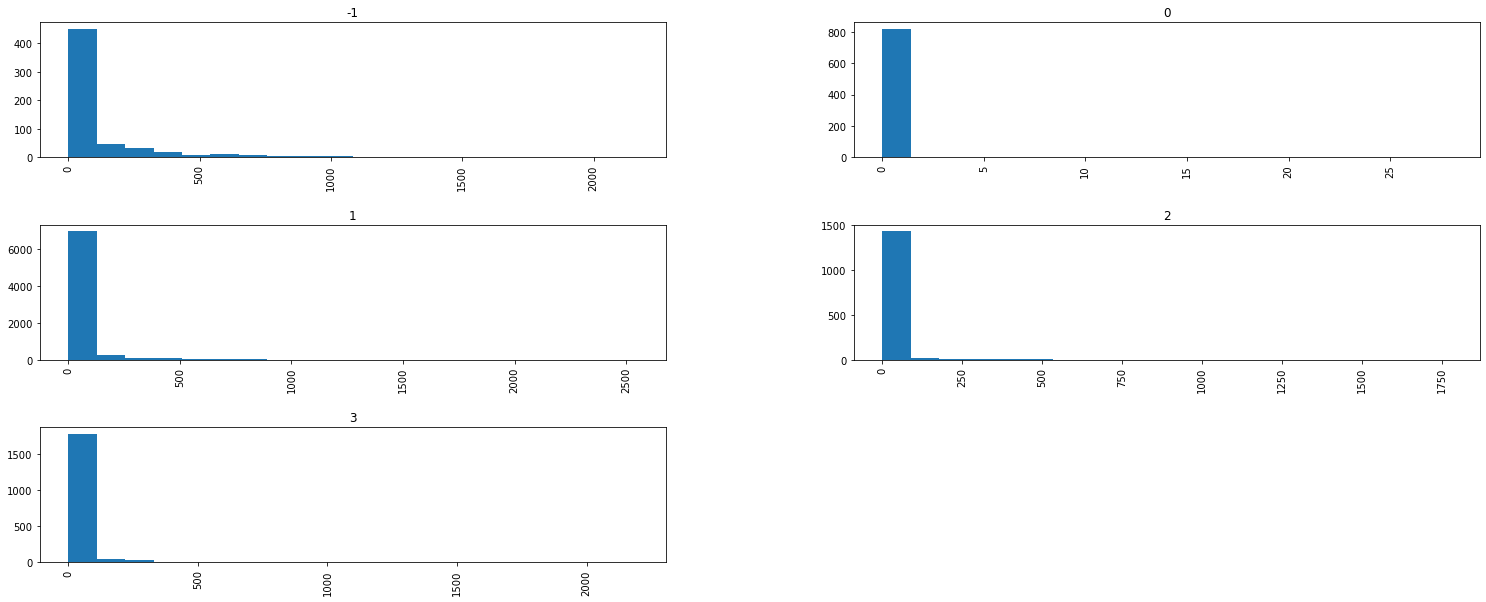

ProductRelated


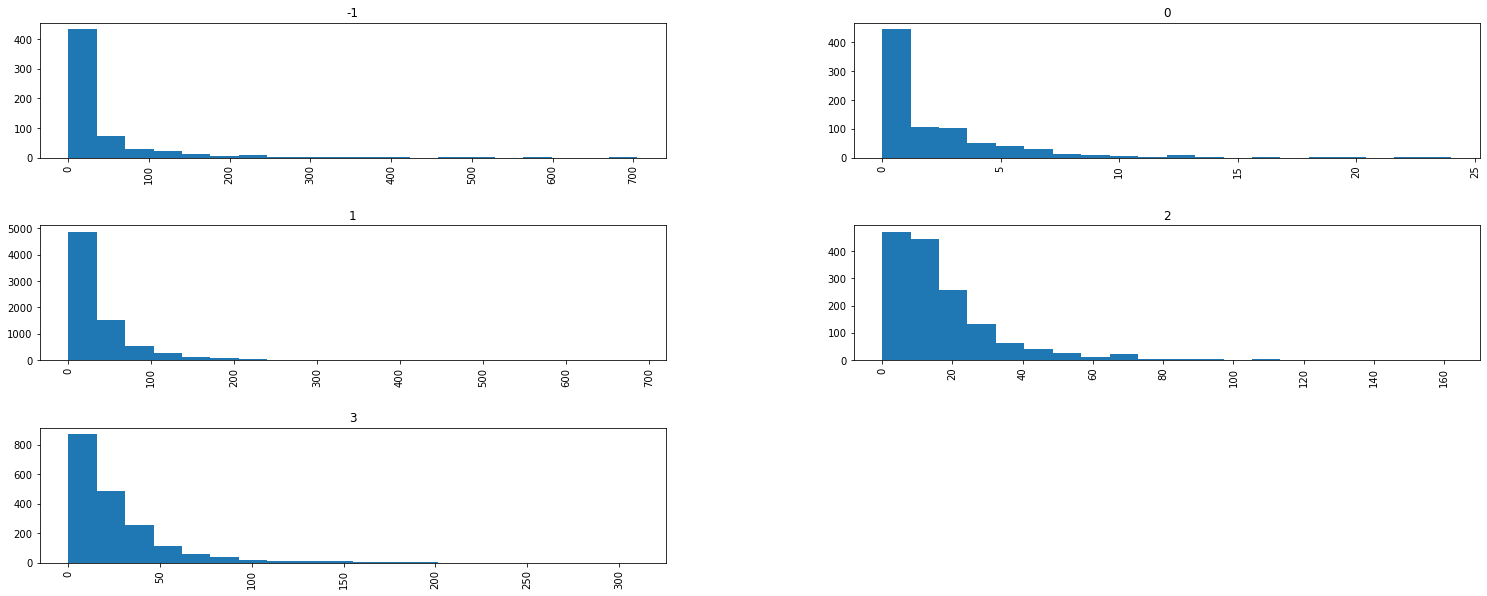

ProductRelated_Duration


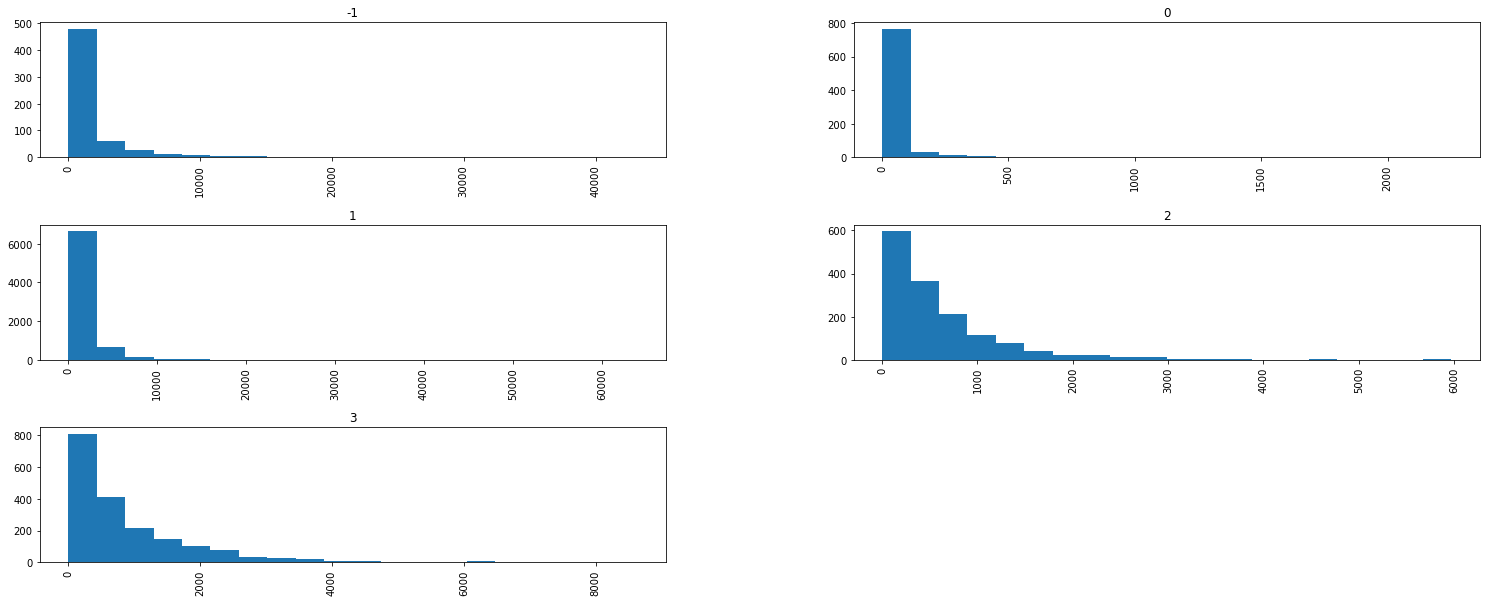

BounceRates


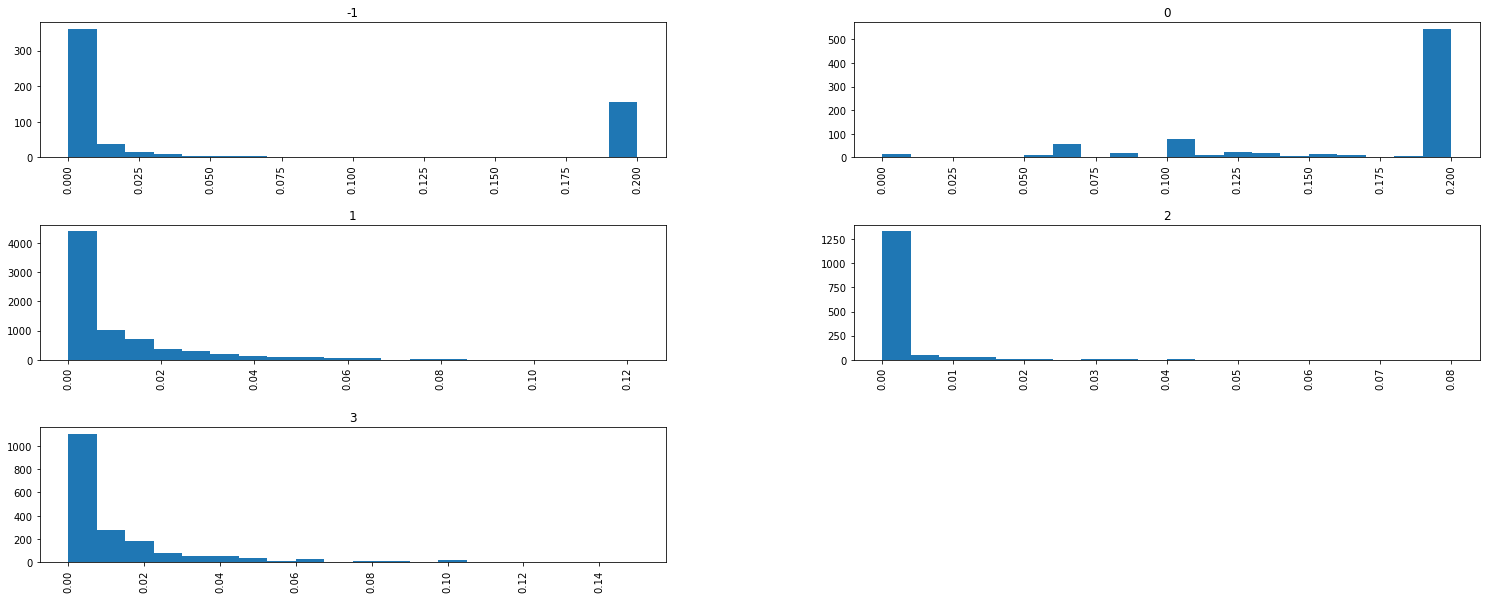

ExitRates


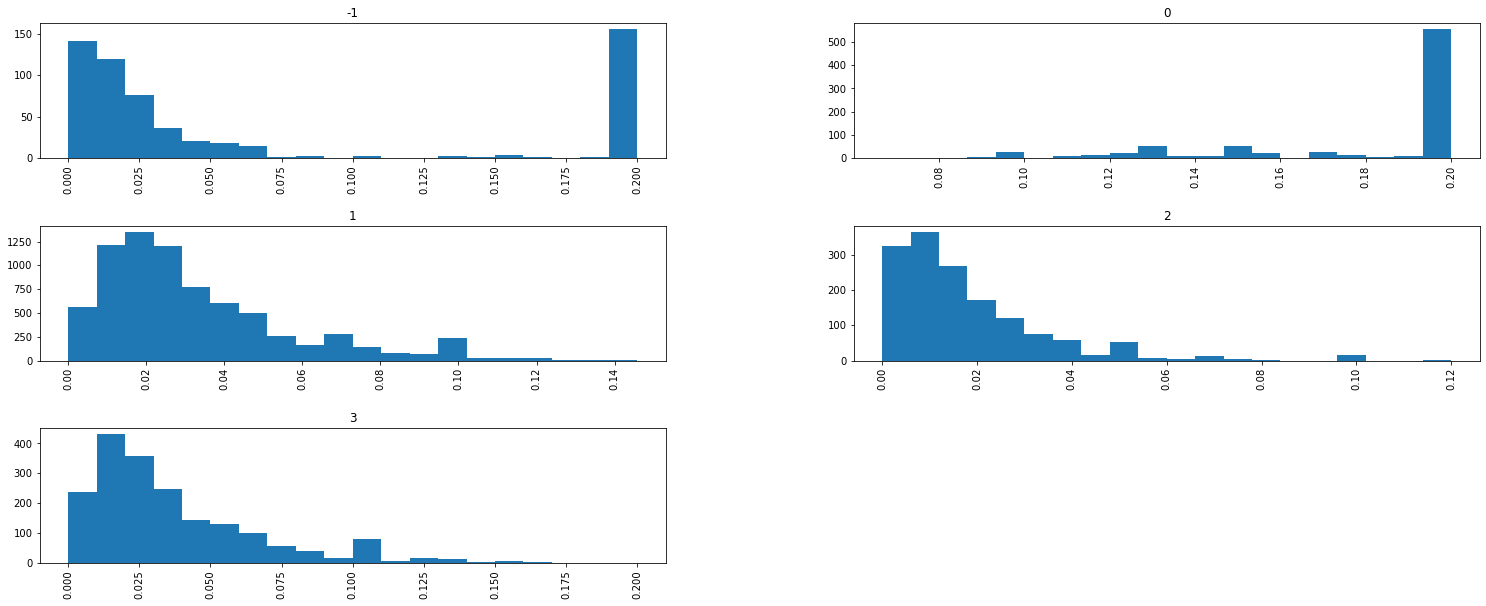

PageValues


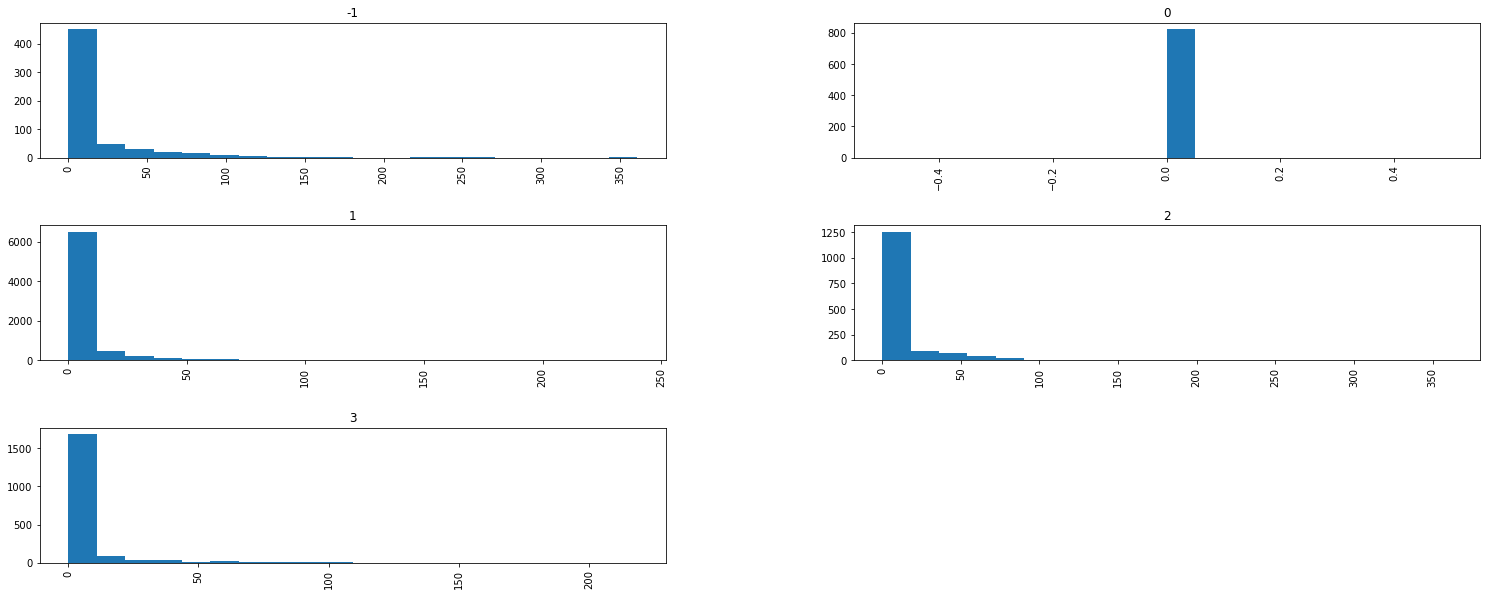

SpecialDay


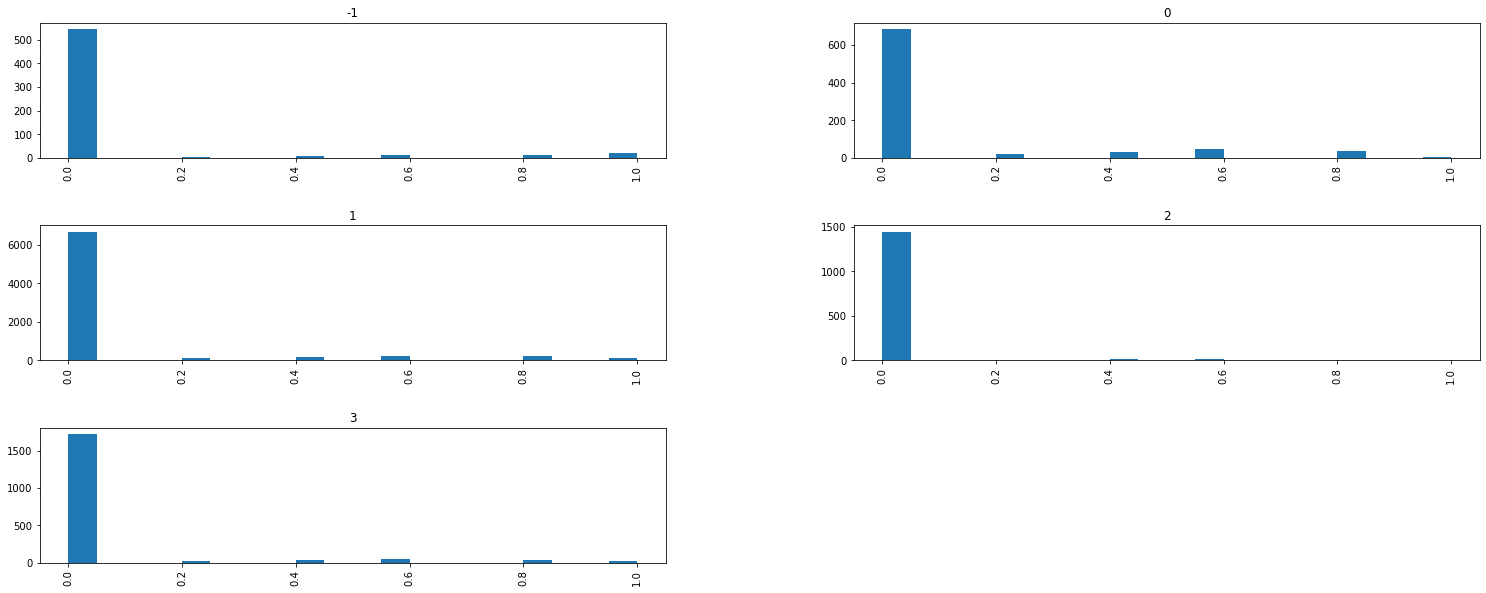

Month


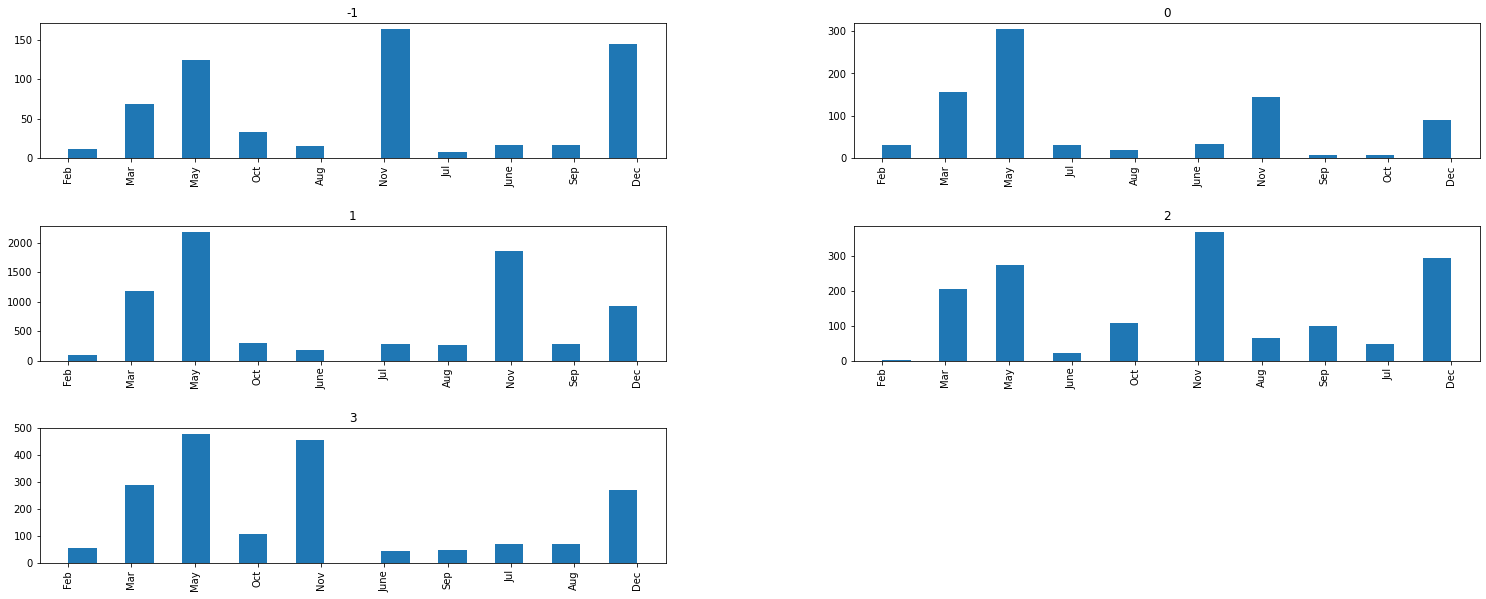

OperatingSystems


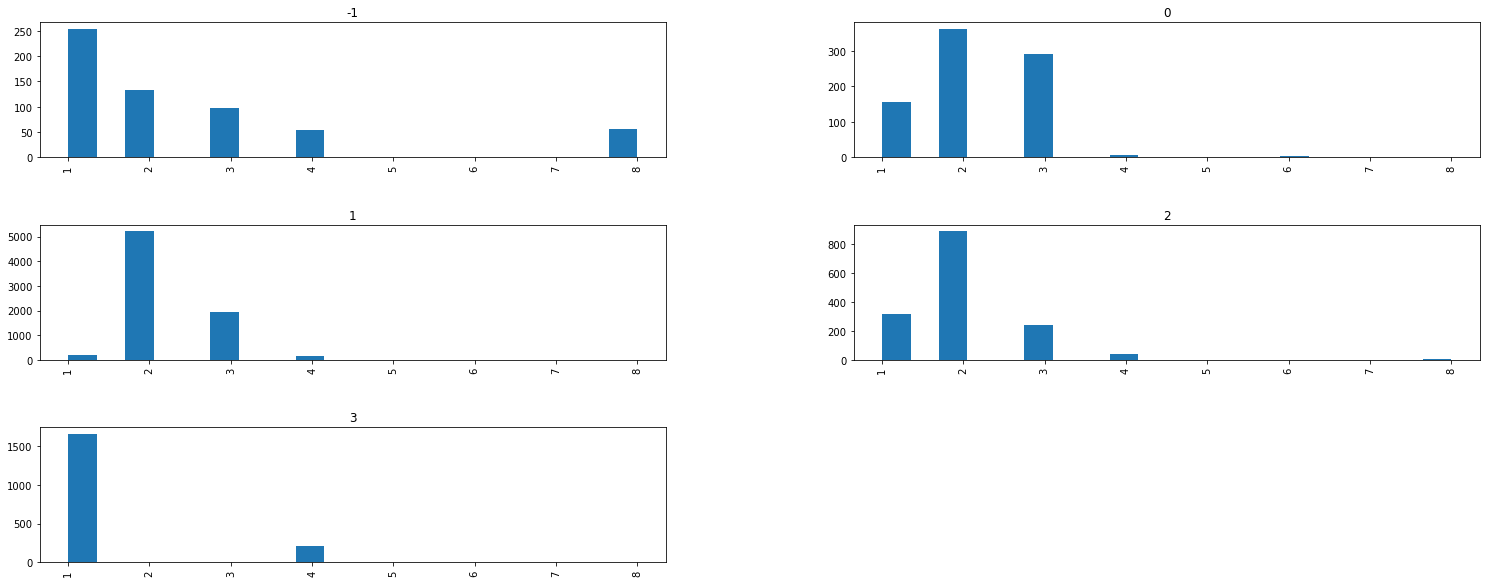

Browser


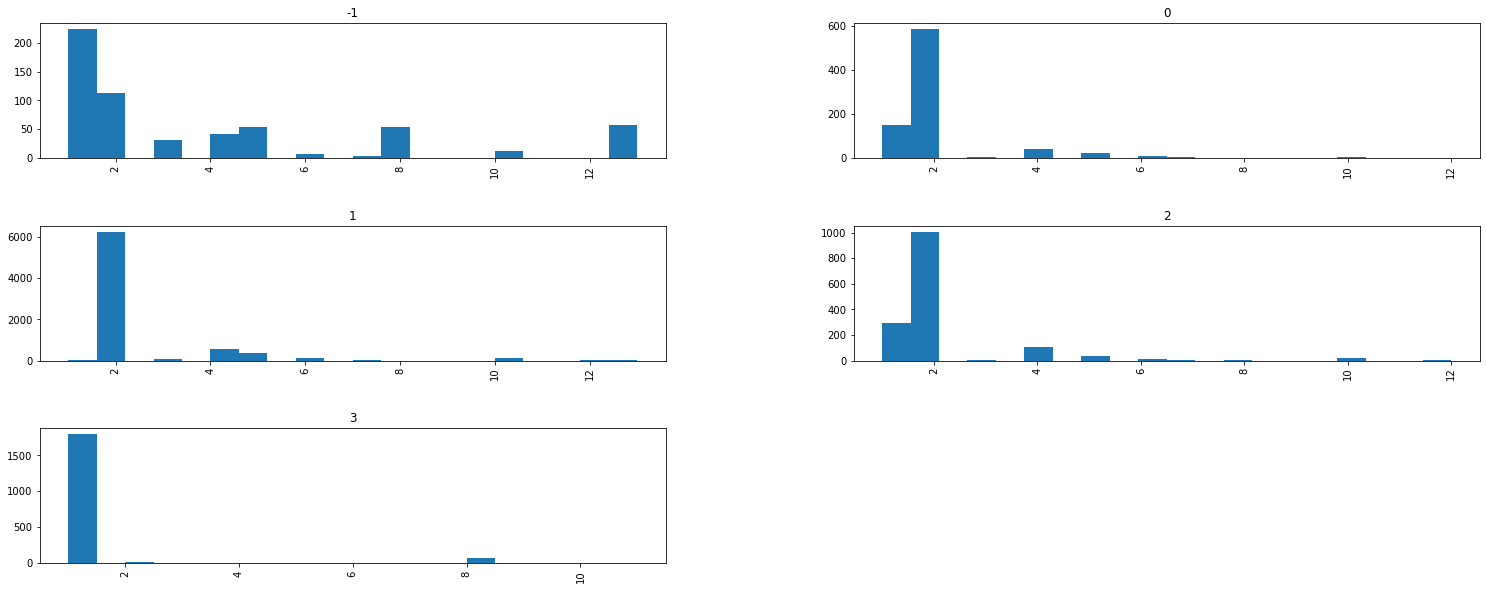

Region


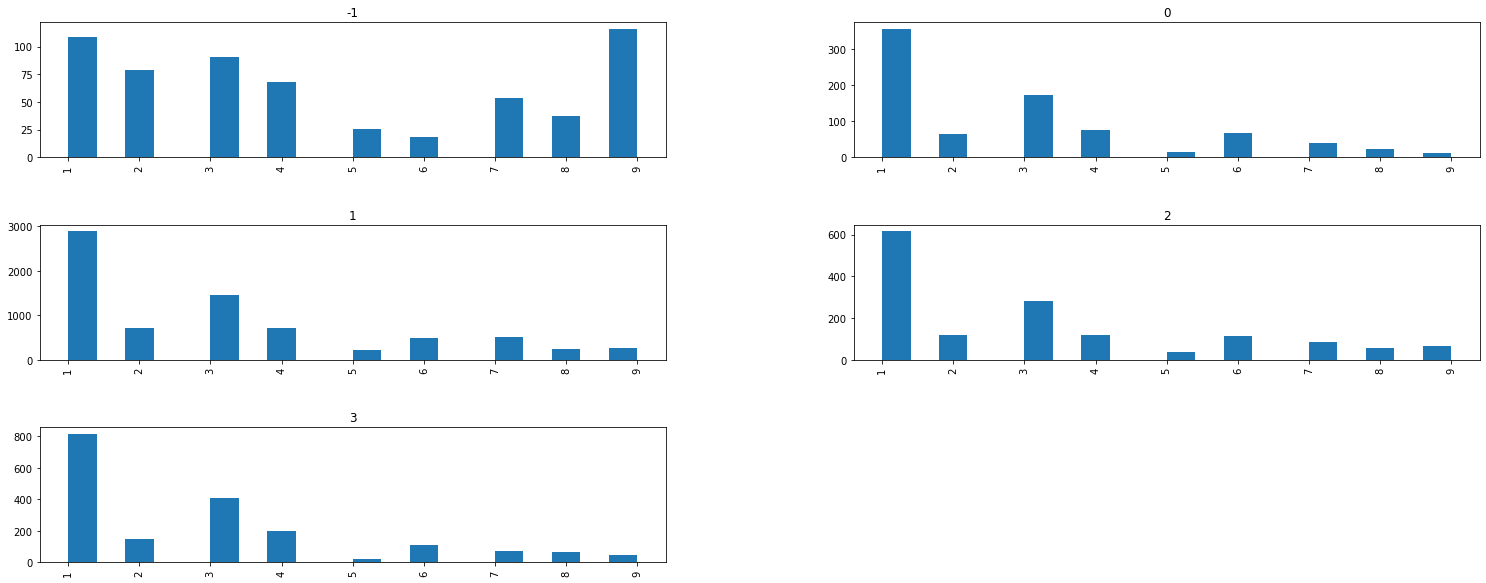

TrafficType


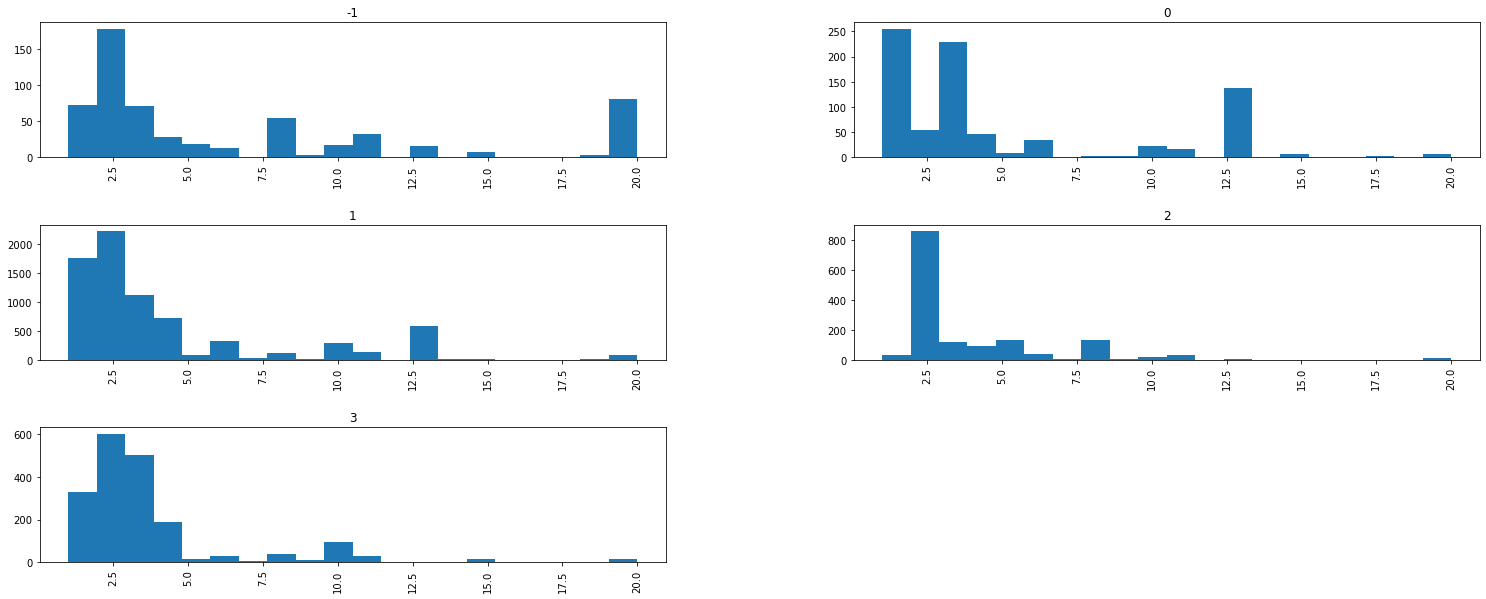

VisitorType


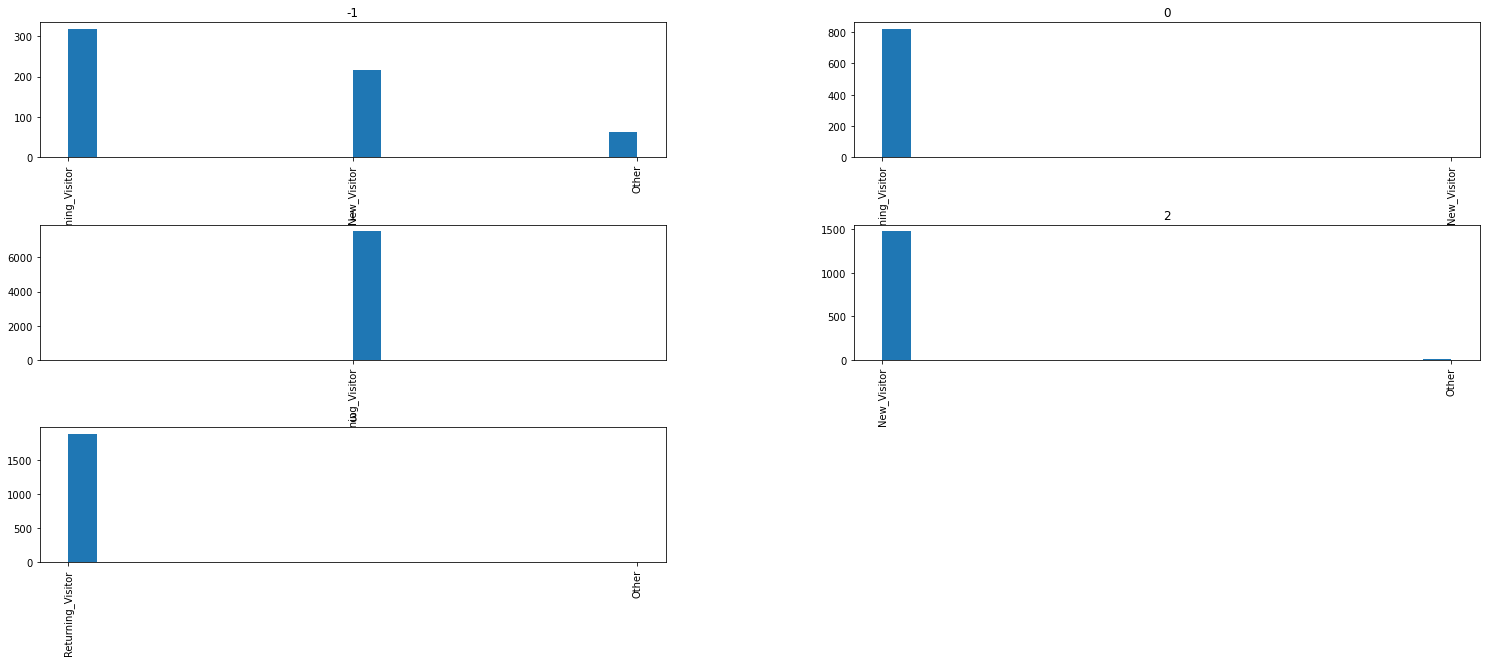

Weekend


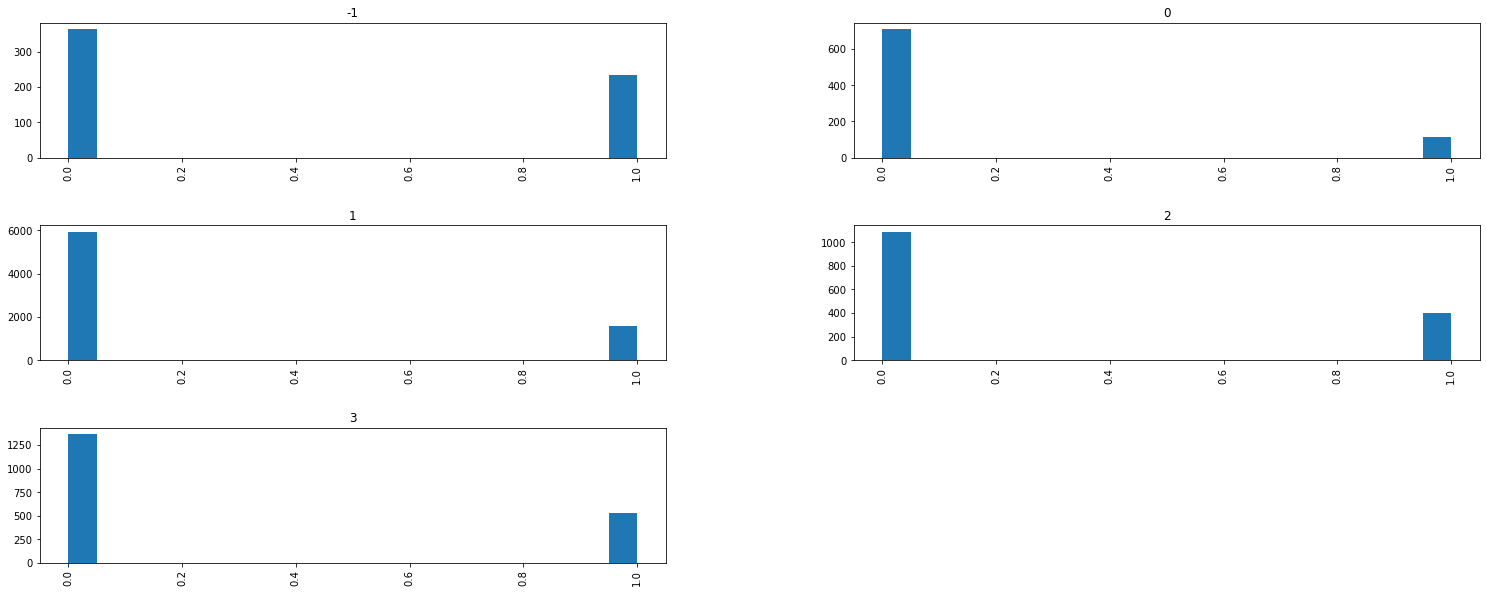

Revenue


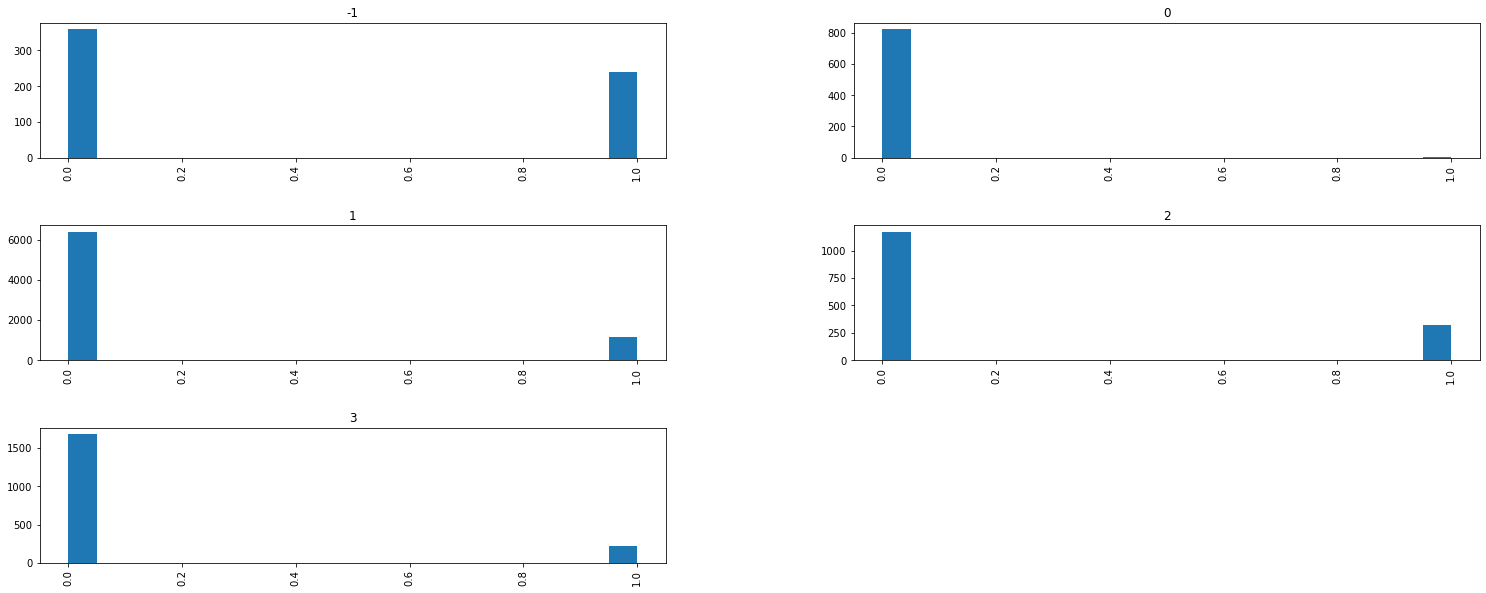

Cluster


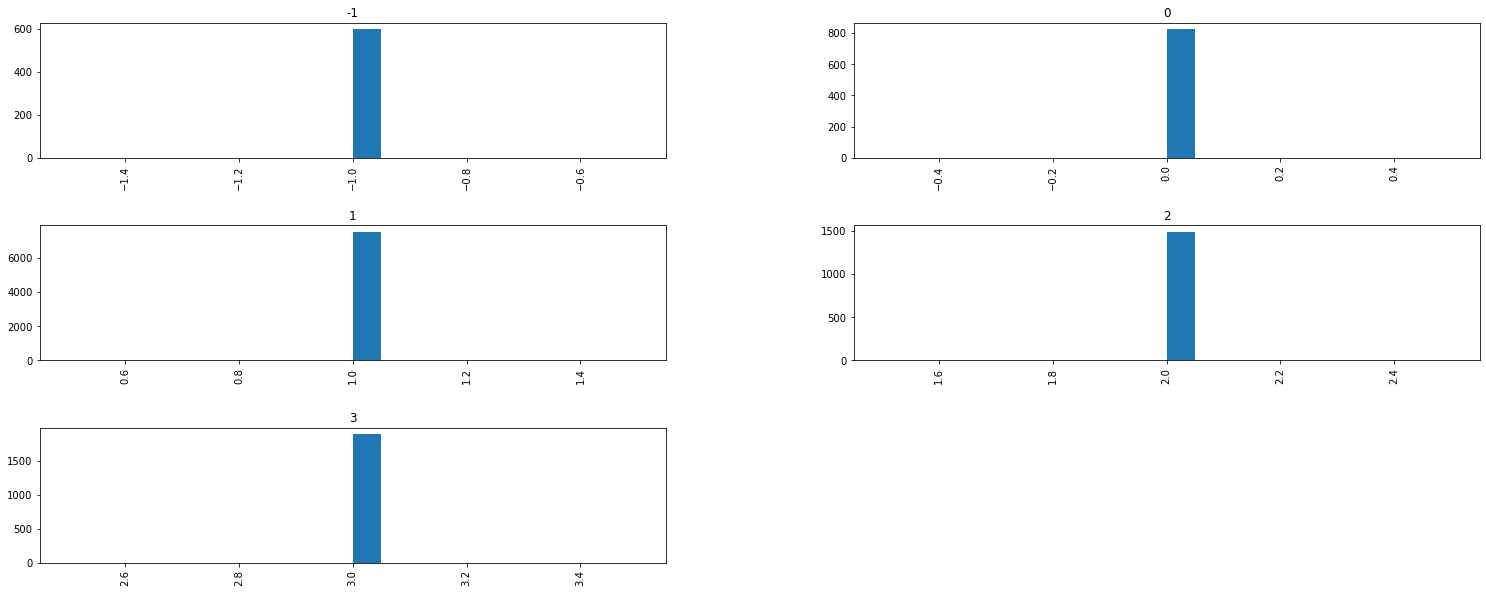

In [45]:
draw_distributions(online_shoppers_df, online_shoppers_df["Cluster"])

Kilka obserwacji na podstawie wykresów
* Osoby należące do klastra 0 mają *PageValues* równy 0, rzadko odwiedzają strony i nie spędzają tam dużo czasu, mają wyższy wskaźnik *BounceRate* i *ExitRate* oraz zazwyczaj nie przynoszą zysku
* Osoby należące do klastra 1 w całości są klientami powracającymi, używają głównie systemu nr 2 lub 3 i przeglądarki nr 2
* Osoby należące do klastra 2 korzystają z przeglądarki i systemu nr 1.
* Osoby z klastra 3 korzystają w znacznej większości z przeglądarki nr 1
* Osoby należące do klastra 1 i 2 mają znacznie mniejszy wskaźnik *BounceRate* i *ExitRate*
* Osoby z klastrów 1, 2, 3 mają niższe wartości *BounceRates*.
* Oprócz outlierów zawiera dla prawie każdego klastra podobny stosunek dni zakupów w weekend, a w tygodniu.